### Capstone Project 1 - Predicting the nightly rate of Airbnb property<br/>

<img style="float: left;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/200px-Airbnb_Logo_B%C3%A9lo.svg.png">

In the following EDA, it is aimed to answer the following questions:

##### Questions :
    
•	How do prices of listings vary by location?<br/>
•	How does the demand for Airbnb rentals fluctuate across the year?<br/>
•	Are the demand and prices of the rentals correlated?<br/>
•	What are the different types of properties in SF? Do they vary by neighborhood?<br/>
•	What makes a host 'Super host'?<br/>
•	Do regular hosts and super hosts have different cancellation and booking policies?<br/>
•	What is the availability of a property in different neighborhoods?
•   Are the prices and review rating of properties correlated?

#### To answer the above questions following data wrangling and visualizations steps were carried out :
#### Completed<br/>
•	Room type with count (in numbers and percentage) in neighborhood<br/>
•	Average price per night (apt, house, Condo)<br/>
•	Prices of properties hosted by a Superhost<br/>
•	Response time/response rate of a Superhost<br/>
•	Classifying the pricing as per type of property (apt, accommodating 2,4,5,6 people and price)<br/>
•	room types hosted by Superhost<br/>
•	Average price of the day by week<br/>
•	Average price across listings for the entire year<br/>
•	Which are the most rented neighborhoods (basing on availability)<br/>
•	What localities in SF are rated highly by guests?(review ratings)<br/>

#### Questions for which data to be visualized :<br/>
    

•	estimated income per month (availability and price already available, to multiply non-availability * price)<br/>
•	amenities - exploration (categorical)<br/>
•	pet friendly(house rules) - exploration<br/>
•	superhost correlation with reviews<br/>







#### Loading all the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
pd.set_option('display.max_columns', None)
import seaborn as sns
#!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c conda-forge geojson --yes
#!conda install -c conda-forge missingno --yes
import missingno as msno
import datetime
import geojson
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from folium import CircleMarker
import scipy.stats as stats
from scipy.stats import shapiro

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

#### Loading all the datasets

#### 1. Listings dataset

In [3]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,today,t,1,1,2,64,2019-03-06,180,52,2009-07-23,2019-02-17,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,80%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache

#### 2. Calendar dataset

In [4]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,138619,2019-03-06,f,$160.00,$160.00,30,30
1,958,2019-03-06,f,$158.00,$158.00,1,30
2,958,2019-03-07,f,$158.00,$158.00,1,30
3,958,2019-03-08,f,$156.00,$156.00,1,30
4,958,2019-03-09,f,$154.00,$154.00,1,30


#### 3. Reviews dataset

In [5]:
df_reviews = pd.read_csv('reviews 2.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


#### Verifying data types in all columns anc cleaning up the data frame for use

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

#### Dropping columns not useful for the project


In [7]:
df1 = df.drop(columns = ['listing_url','scrape_id','thumbnail_url','medium_url','picture_url','xl_picture_url',
                         'host_url','host_thumbnail_url','host_picture_url','host_acceptance_rate',
                         'neighbourhood_group_cleansed','country'])

In [8]:
df1.shape

(7151, 94)

In [9]:
df1['id'].nunique()

7151

#### There are 7151 unique listings corresponding to 7151 rows in the dataframe - with no duplicates observed


In [10]:
df1.dtypes

id                                                int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                      

#### Checkign for null values in the dataframe

In [11]:
nullvalues = df1.isnull().sum().sort_values(ascending= False)
nullvalues/len(df1)*100                      ## finding the percentage of null values in the column

square_feet                                     98.238009
monthly_price                                   83.904349
weekly_price                                    83.904349
notes                                           38.358272
license                                         35.659348
access                                          33.365963
interaction                                     32.051461
transit                                         28.247798
house_rules                                     26.877360
neighborhood_overview                           26.597679
host_about                                      23.828835
security_deposit                                20.542581
review_scores_value                             19.969235
review_scores_checkin                           19.955251
review_scores_location                          19.955251
review_scores_accuracy                          19.927283
review_scores_cleanliness                       19.913299
review_scores_

**As there are 2 entries for bedrooms and 7 entries for beds columns which have NaN values, these are replaced with 
mean values of the column.<br/>**

**For square feet column, there are 126 NaN entries out of 7151 (2% entries), values are replaced with Mean values of 
the column**

In [12]:
df1['bedrooms'].fillna(df1['bedrooms'].mean(), inplace = True)
df1['beds'].fillna(df1['bedrooms'].mean(), inplace = True)
df1['square_feet'].fillna(df1['square_feet'].mean(), inplace = True)

Visualizing missing values

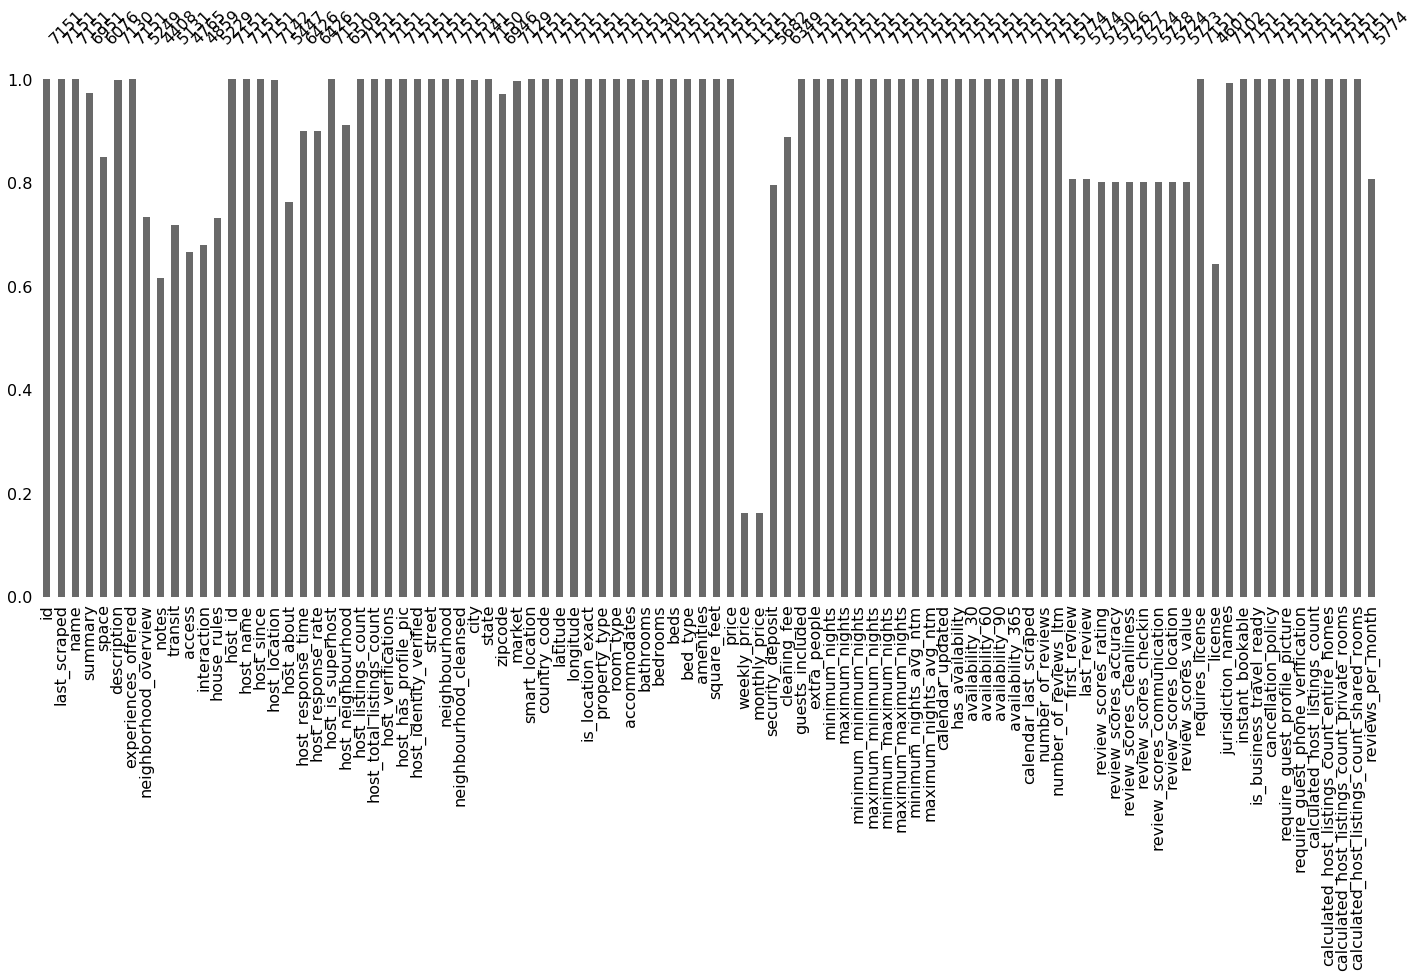

In [13]:
msno.bar(df1)

Observations from the above values :

Several of the rows have missing values.
For optimal dataset, we will consider columns with null values ~ <10% (0.1)

Following values have significant null values - also most of the following columns are str type 

```square_feet```                                     98.2380<br/>
```monthly_price```                                   83.9043<br/>
```weekly_price```                                    83.9043<br/>
```notes```                                           38.3583<br/>
```license```                                         35.6593<br/>
```access```                                          33.3660<br/>
```interaction```                                     32.0515<br/>
```transit```                                         28.2478<br/>
```house_rules```                                     26.8774<br/>
```neighborhood_overview```                           26.5977<br/>
```host_about```                                      23.8288<br/>
```security_deposit```                                20.5426<br/>
```review_scores_value```                             19.9692<br/>
```review_scores_checkin```                           19.9553<br/>
```review_scores_location```                          19.9553<br/>
```review_scores_accuracy```                          19.9273<br/>
```review_scores_cleanliness```                       19.9133<br/>
```review_scores_communication```                     19.8993<br/>
```review_scores_rating```                            19.8713<br/>
```first_review```                                    19.2560<br/>
```reviews_per_month```                               19.2560<br/>
```last_review```                                     19.2560<br/>
```space```                                           15.0329<br/>

Most of the columns will not impact our initial analysis and analysis will be carried out with no replacement of NaN values and it is expected that there will be no impact on the outcome of prediction based on above missing values. To the contrary, replacing the NaN with any aggregated values will probably skew the results (due to high number of Null values)


#### Cleaning up of data in columns

#### Cleaning up the $ sign in the price columns, removing the , to make it easier for computation

In [14]:
df1['price'] = df1['price'].astype(str)
df1['weekly_price'] = df1['weekly_price'].astype(str)
df1['monthly_price'] = df1['monthly_price'].astype(str)
df1['security_deposit'] =df1['security_deposit'].astype(str)
df1['cleaning_fee'] = df1['cleaning_fee'].astype(str)

In [15]:
price = df1["price"].apply(lambda row: row[1:])      # Removing the first value $ from the string
price = price.apply(lambda row: "".join(row.split(",")))    # removing the , values from the price
price = price.astype(float)          # converting str to float datatype

df1['price'] = price

df1['price'].head()

0    170.0
1    235.0
2     65.0
3     65.0
4    785.0
Name: price, dtype: float64

Removing single row which has price value 0, and applicable listing in df_calendar

In [16]:
df1['price'] = df1['price'].replace(0, np.nan)
df1['price'].dropna(how = 'all', axis = 0, inplace = True)
df_calendar['price']= df_calendar['price'].replace(0, np.nan)
df_calendar['price'].dropna(how='all', axis=0, inplace = True)


#### 1. Data wrangling from df1

##### How do prices of listings vary by location?

In [17]:
df_neighborhood = df1[['neighbourhood', 'room_type']]
df_neighborhood.head()

,neighbourhood,room_type
0,Duboce Triangle,Entire home/apt
1,Bernal Heights,Entire home/apt
2,Cole Valley,Private room
3,Cole Valley,Private room
4,Western Addition/NOPA,Entire home/apt


In [18]:
df_neighborhood.nunique()

neighbourhood    55
room_type         3
dtype: int64

There are 55 neighborhoods listed in the Airbnb dataset with 3 different room types
Exploring the neighborhoods and room types

Text(0, 0.5, 'Count')

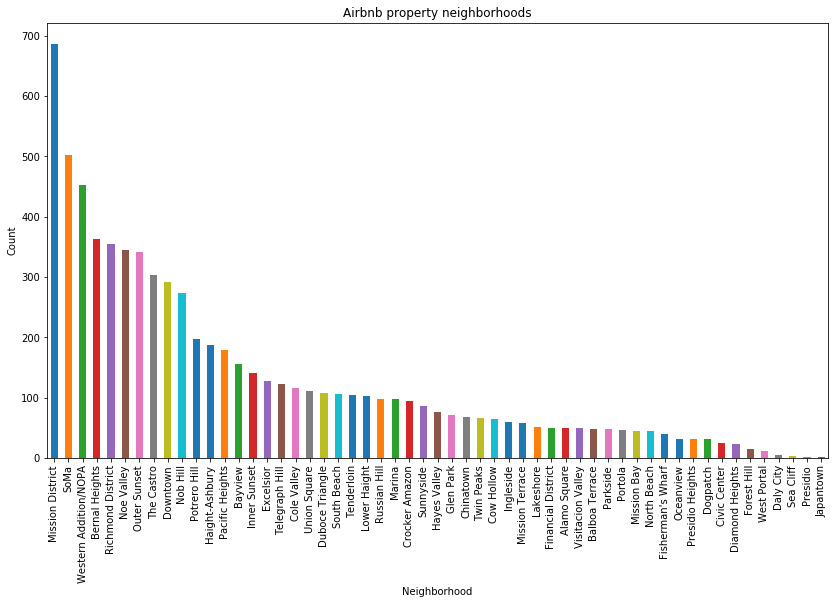

In [19]:
ax = df1['neighbourhood'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Airbnb property neighborhoods")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Count")

###### It is evident from the above graph that Mission district has the maximum listings followed by SoMa, Wester Addition. However, Mission district  has different types of properties listed. 

#### Examining the types of properties available on Airbnb

(-0.5, 25.5, 0.0, 3163.65)

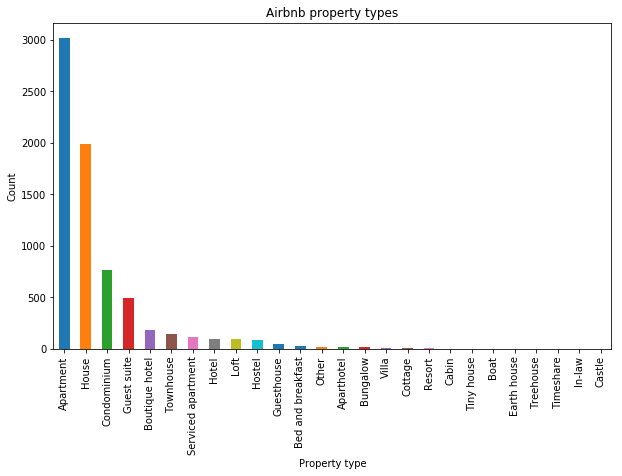

In [20]:
ax2 = df1['property_type'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Airbnb property types")
ax2.set_xlabel("Property type")
ax2.set_ylabel("Count")
ax2.grid(False)
plt.axis('on')


Above properties types are further classified - exploring those values

In [21]:
df_room_type = df1[['room_type']]
df_room_type.insert(1, 'Count', 1)

room_type = df_room_type.groupby(['room_type']).count()
room_type.sort_values('Count', ascending =False)

,Count
room_type,
Entire home/apt,4366
Private room,2606
Shared room,179


#### Plotting the above values on a bar graph

(0.0, 4584.3, -0.5, 2.5)

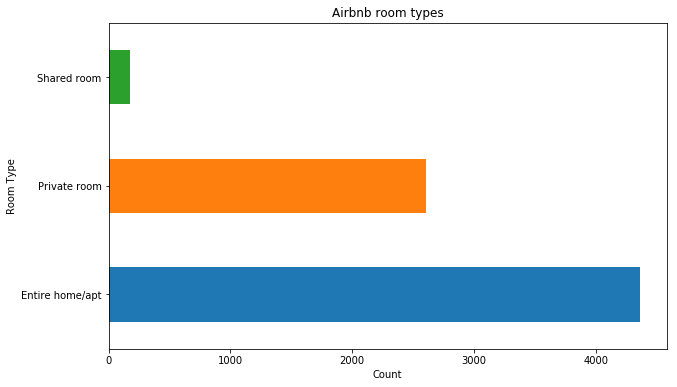

In [22]:
ax1 = df1['room_type'].value_counts().plot(kind='barh',
                                    figsize=(10,6),
                                    title="Airbnb room types")
ax1.set_xlabel("Count")
ax1.set_ylabel("Room Type")
ax1.grid(False)
plt.axis('on')


#### Most properties listed in Airbnb are Apartments, followed by houses and condos as shown in the graph

#### Variation of Pricing by neighborhood

In [23]:
df_nb_price = df1[['neighbourhood','price']]
df_nb_price_mean = df_nb_price.groupby(['neighbourhood'])['price'].mean()

df_price_sorted = df_nb_price_mean.sort_values(ascending = False)
df_price_sorted

neighbourhood
Sea Cliff                1653.333333
Fisherman's Wharf         499.050000
Japantown                 380.000000
Marina                    348.948980
Dogpatch                  340.225806
Presidio Heights          337.290323
Pacific Heights           327.988764
Russian Hill              308.122449
Cow Hollow                284.692308
Parkside                  281.446809
Twin Peaks                270.272727
Western Addition/NOPA     258.137168
Forest Hill               254.400000
Financial District        242.080000
Mission District          235.238719
The Castro                235.046053
North Beach               227.522727
Noe Valley                227.465116
South Beach               223.245283
SoMa                      221.362550
Alamo Square              219.920000
Telegraph Hill            219.203252
Hayes Valley              218.526316
Potrero Hill              218.441624
Lower Haight              217.676471
Nob Hill                  215.260073
Downtown                

#### Visualizing above values in a bar graph

(0.0, 1736.0, -0.5, 54.5)

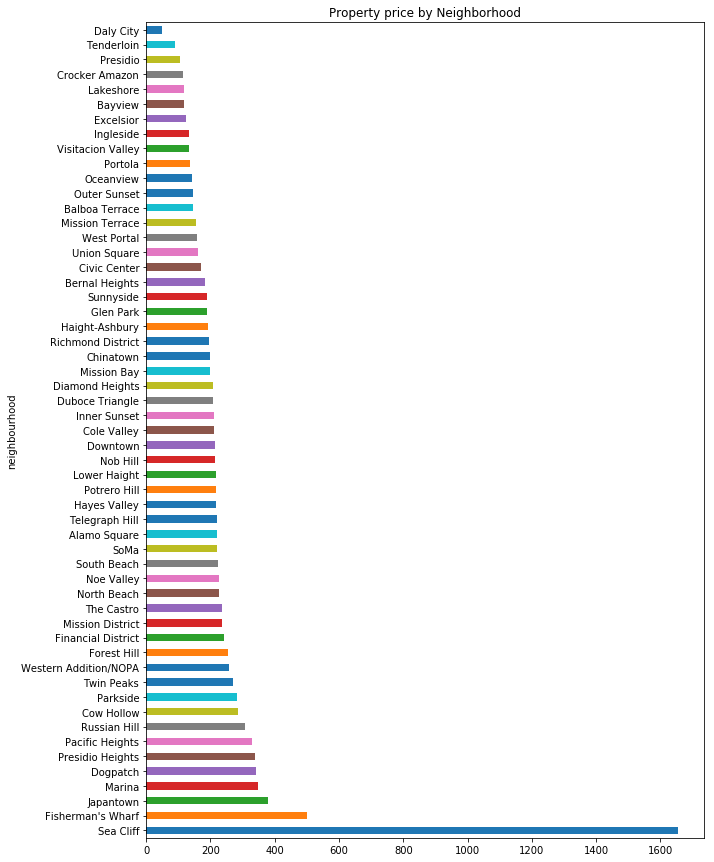

In [24]:
df_price_sorted.plot(kind='barh',figsize=(10,15),
                                    title="Property price by Neighborhood")
ax1.set_xlabel("Price")
ax1.set_ylabel("Neighborhood")
ax1.grid(False)
plt.axis('on')

The average nightly rate of property in Sea cliff is much higher than rest of the SF.<br/>
Mission district, which has the maximum number of properties is ranking 15th in price

(0.0, 402.15, 54.5, -0.5)

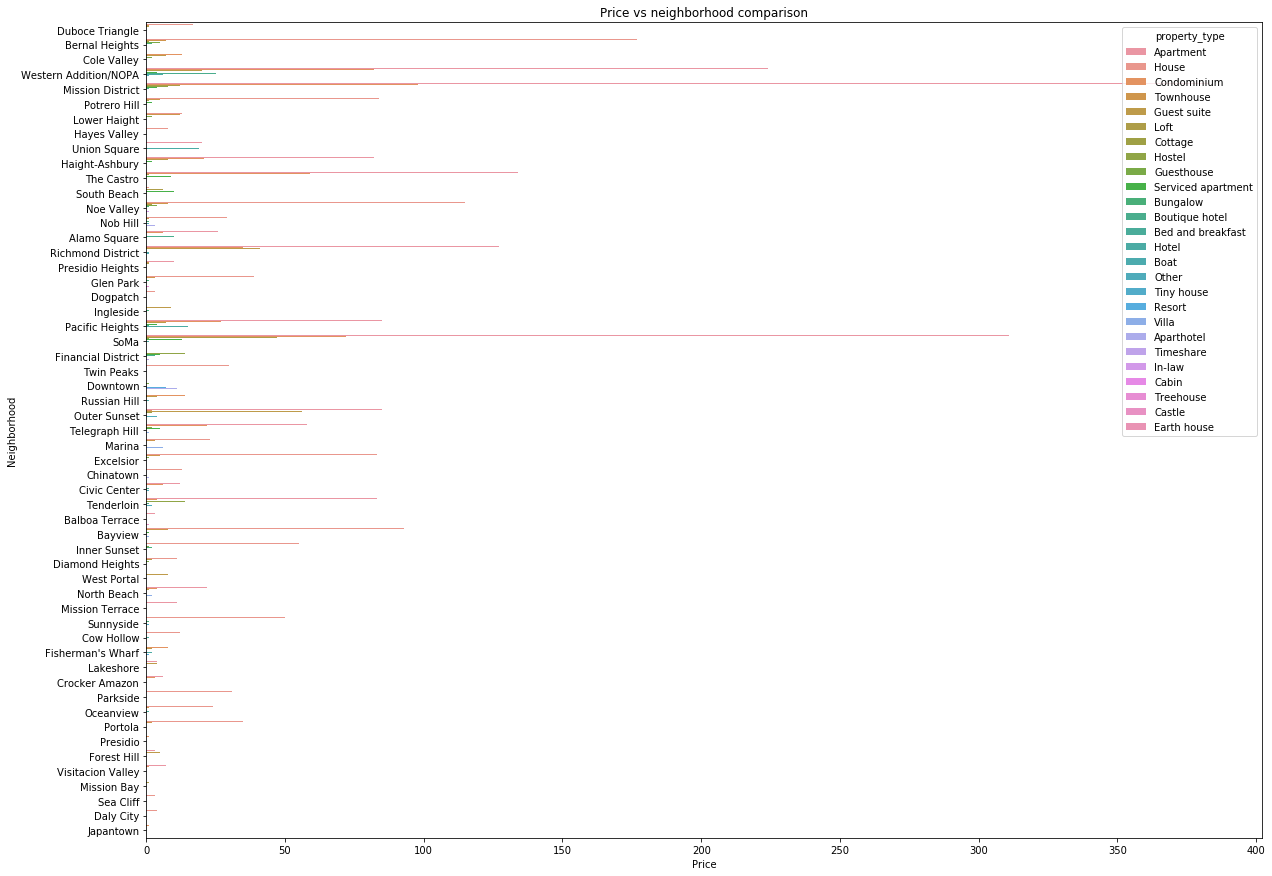

In [25]:
plt.figure(figsize = (20,15))
sns.countplot(y = 'neighbourhood', data = df1, hue = 'property_type', orient  = 'h')
plt.xlabel ('Price')
plt.ylabel ('Neighborhood')
plt.title ('Price vs neighborhood comparison')
ax1.grid(False)
plt.axis('on')

## Reducing the number of property types to 10 (most frequently rented) and replotting the above graph - to be done

(-0.5, 10.5, 0.0, 402.15)

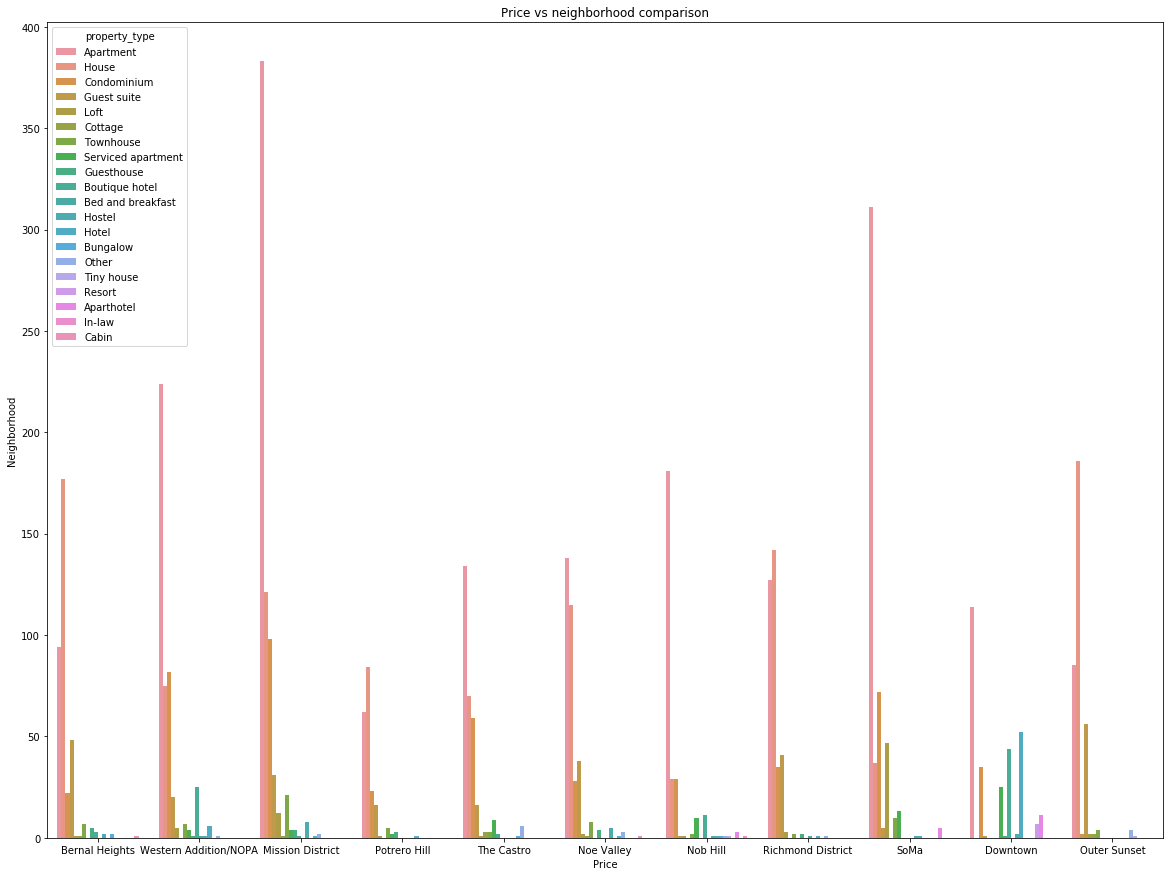

In [26]:
df1_neighborhood = df1.loc[(df1['neighbourhood'] == 'Mission District') | \
                           (df1['neighbourhood'] == 'SoMa') |\
                           (df1['neighbourhood'] == 'Western Addition/NOPA') | \
                           (df1['neighbourhood'] == 'Bernal Heights') | \
                           (df1['neighbourhood'] == 'Richmond District') | \
                             (df1['neighbourhood'] == 'Noe Valley') | \
                           (df1['neighbourhood'] == 'Outer Sunset') | \
                           (df1['neighbourhood'] == 'The Castro') | \
                            (df1['neighbourhood'] ==  'Downtown') | \
                           (df1['neighbourhood'] == 'Nob Hill') | \
                            (df1['neighbourhood'] == 'Potrero Hill')]


plt.figure(figsize = (20,15))
sns.countplot(x = 'neighbourhood', data = df1_neighborhood, hue = 'property_type', orient  = 'v')
plt.xlabel ('Price')
plt.ylabel ('Neighborhood')
plt.title ('Price vs neighborhood comparison')
plt.axis('on')

## Exploring Superhosts and non-superhosts


As per Airbnb's policies, following are the requirements to become Superhost:<br/>
##### Superhost requirements<br/>
•	Completed at least 10 trips OR successfully completed 3 reservations that total at least 100 nights<br/>
•	Maintained a 50% review rate or higher<br/>
•	Maintained a 90% response rate or higher<br/>
•	Zero cancellations, with exceptions made for those that fall under Airbnb's Extenuating Circumstances policy<br/>
•	Maintain a 4.8 overall rating<br/>

It is evident from above that properties hosted by Superhosts will have occupancy of atleast 100 nights a year<br/>


In [27]:
df1['host_is_superhost'].describe()

count     7151
unique       2
top          f
freq      4219
Name: host_is_superhost, dtype: object

There are no missing values with top values as f (non-superhost)<br/>
For visualization, converting t and f values to 'superhost' and 'non-superhost'

In [28]:
df1['host_is_superhost']= df1['host_is_superhost'].apply(lambda x: x.replace ("t", "superhost"))
df1['host_is_superhost']= df1['host_is_superhost'].apply(lambda y: y.replace("f","not_superhost"))
df1['host_is_superhost'].head()

0        superhost
1    not_superhost
2    not_superhost
3    not_superhost
4    not_superhost
Name: host_is_superhost, dtype: object

In [29]:
superhost = df1['host_is_superhost'].value_counts()

superhost

not_superhost    4219
superhost        2932
Name: host_is_superhost, dtype: int64

Plotting the number of Superhosts on a graph


(-0.5, 1.5, 0.0, 4429.95)

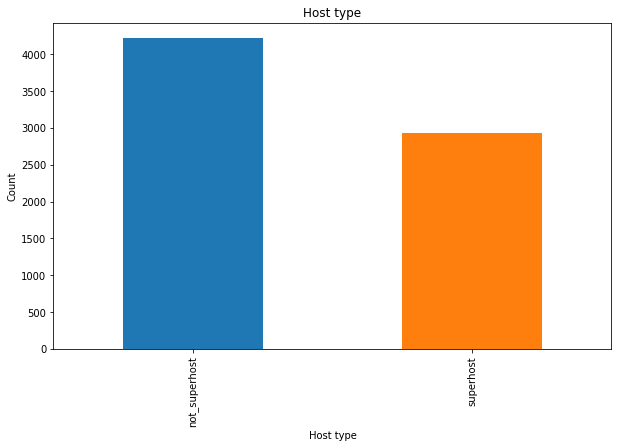

In [30]:
ax3 = df1['host_is_superhost'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Host type")
ax3.set_xlabel("Host type")
ax3.set_ylabel("Count")
ax3.grid(False)
plt.axis('on')

#### Analyzing price of properties where host is Superhost

In [31]:
df_superhost =df1.loc[(df1['host_is_superhost'] == 'superhost') ]

df_superhost['price'].describe()

count    2931.000000
mean      211.217332
std       244.259149
min        28.000000
25%       110.000000
50%       151.000000
75%       235.000000
max      8000.000000
Name: price, dtype: float64

In [32]:
df_nonsuperhost =df1.loc[(df1['host_is_superhost'] == 'not_superhost') ]

df_nonsuperhost['price'].describe()

count     4219.000000
mean       215.397488
std        353.420935
min         10.000000
25%         95.000000
50%        150.000000
75%        236.000000
max      10000.000000
Name: price, dtype: float64

In [33]:
print('The average price of property hosted by a Superhost is :', df_superhost['price'].mean())
print('The average price of property hosted by a non-superhost is :', df_nonsuperhost['price'].mean())
print ('The average price of property in SF :', df1['price'].mean())

The average price of property hosted by a Superhost is : 211.2173319686114
The average price of property hosted by a non-superhost is : 215.39748755629296
The average price of property in SF : 213.68391608391607


As seen above, there is not much difference between the average price of property hosted by a Superhost and <br/>
non-superhost.

Also, the average price of property in SF lies between the average price of property hosted by Superhost<br/>
and non-superhost


In [34]:
df_superhost['number_of_reviews'].mean()

68.8400409276944

In [35]:
df_nonsuperhost['number_of_reviews'].mean()

25.939322114245083

The average number of reviews for Superhosts is much greater than non-superhost

In [36]:
df_superhost['host_response_time'].isna().value_counts()

False    2841
True       91
Name: host_response_time, dtype: int64

Although the above column has 91 null values, lets examine the average response time for a Superhost

In [37]:
df_superhost['host_response_time'].describe()

count               2841
unique                 4
top       within an hour
freq                2270
Name: host_response_time, dtype: object

#### For superhost, the response time within an hour is at 79.9%

In [38]:
df_superhost['host_response_rate'].describe()

count     2841
unique      28
top       100%
freq      2582
Name: host_response_rate, dtype: object

#### For superhost, the response rate of 100% is at 90.8%    (100% response given at 90.8% times)

In [39]:
df_nonsuperhost['host_response_rate'].describe()

count     3585
unique      44
top       100%
freq      2486
Name: host_response_rate, dtype: object

#### For not a superhost, the response rate of 100% is at 69.3% (100% response given at 69.3% times)


Visualizing the prices of properties hosted by Superhosts and non-superhosts

(-0.5, 20.5, 0.0, 1113.0)

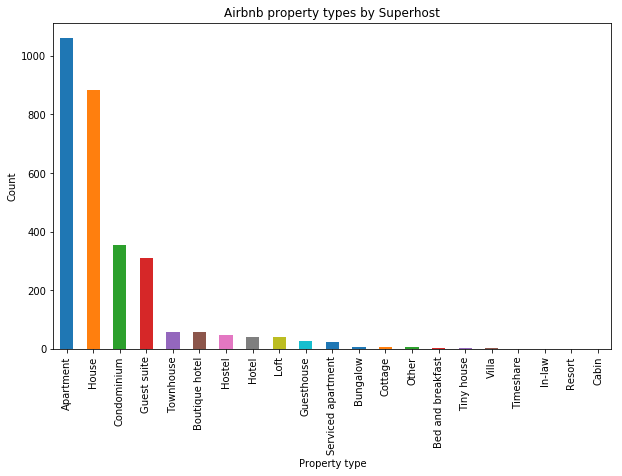

In [40]:
ax4 = df_superhost['property_type'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Airbnb property types by Superhost")
ax4.set_xlabel("Property type")
ax4.set_ylabel("Count")
ax4.grid(False)
plt.axis('on')

(-0.5, 22.5, 0.0, 2050.65)

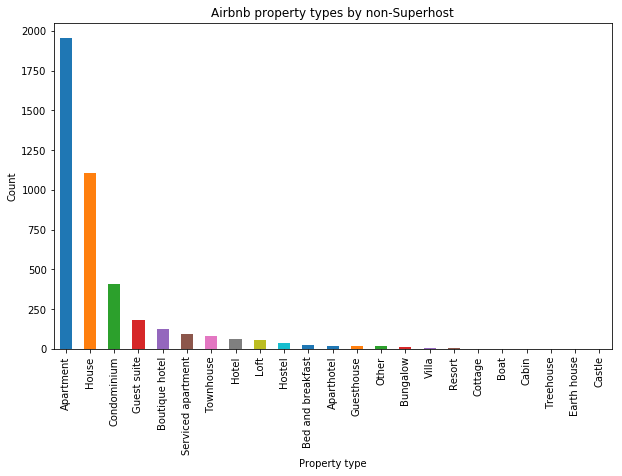

In [41]:
ax5 = df_nonsuperhost['property_type'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Airbnb property types by non-Superhost")
ax5.set_xlabel("Property type")
ax5.set_ylabel("Count")
ax5.grid(False)
plt.axis('on')

As evident from earlier graph, the maximum properties available are Apartments, followed by House and <br/> Condominiums for both Superhosts and non-Superhosts

Reviewing number of reviews by neighborhood/and Superhost status


In [42]:
df_superhost_sorted = df_superhost.sort_values(by = 'number_of_reviews', ascending = False)
df_superhost_sorted['number_of_reviews'].head()


348    677
6      647
440    608
365    602
439    576
Name: number_of_reviews, dtype: int64

In [43]:
df1_superhost_sorted = df_superhost_sorted.loc[(df_superhost_sorted['neighbourhood'] == 'Mission District') | \
                           (df_superhost_sorted['neighbourhood'] == 'SoMa') |\
                           (df_superhost_sorted['neighbourhood'] == 'Western Addition/NOPA') | \
                           (df_superhost_sorted['neighbourhood'] == 'Bernal Heights') | \
                           (df_superhost_sorted['neighbourhood'] == 'Richmond District') | \
                             (df_superhost_sorted['neighbourhood'] == 'Noe Valley') | \
                           (df_superhost_sorted['neighbourhood'] == 'Outer Sunset') | \
                           (df_superhost_sorted['neighbourhood'] == 'The Castro') | \
                            (df_superhost_sorted['neighbourhood'] ==  'Downtown') | \
                           (df_superhost_sorted['neighbourhood'] == 'Nob Hill') | \
                            (df_superhost_sorted['neighbourhood'] == 'Potrero Hill')]

(0.0, 32.55, 341.5, -0.5)

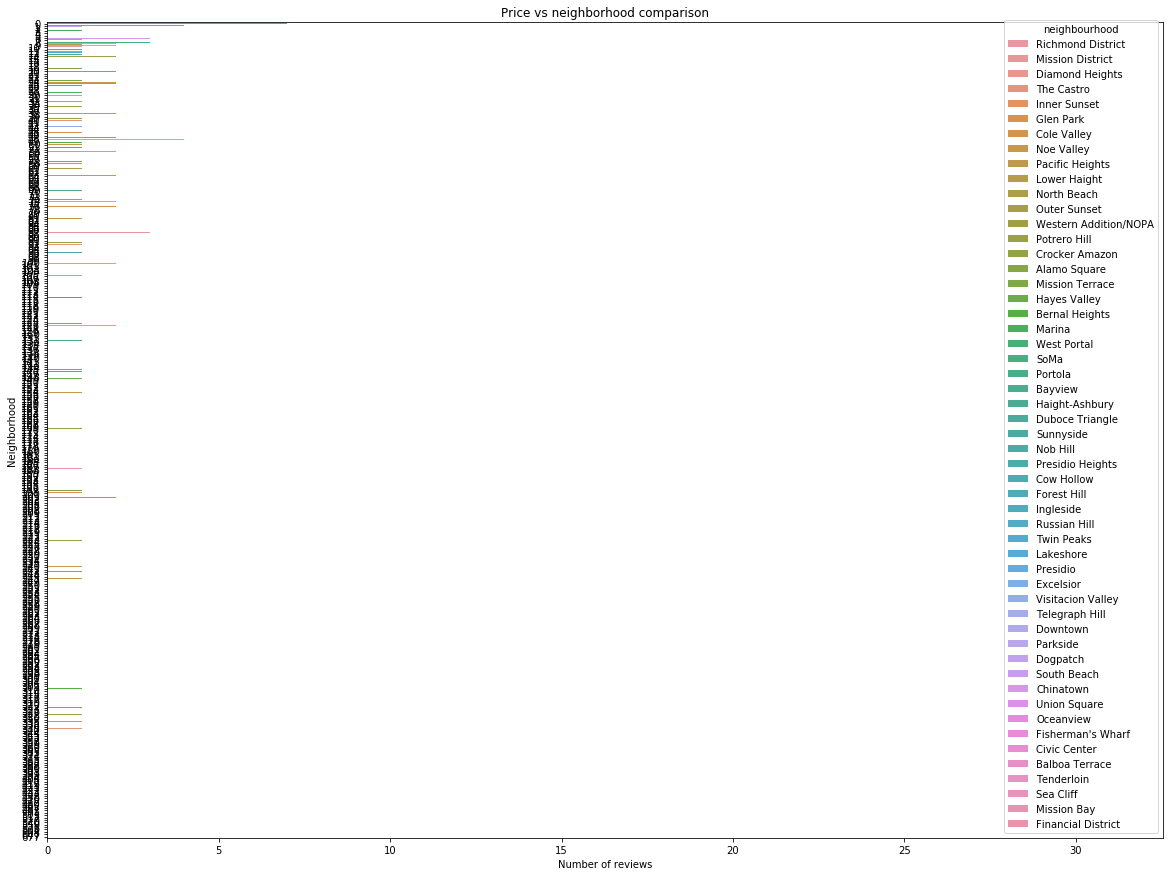

In [44]:
plt.figure(figsize = (20,15))
sns.countplot(y = 'number_of_reviews', data = df_superhost_sorted, hue = 'neighbourhood', orient  = 'h')
plt.xlabel ('Number of reviews')
plt.ylabel ('Neighborhood')
plt.title ('Price vs neighborhood comparison')
ax1.grid(False)
plt.axis('on')


Filtering the above graph to display top 10 neighborhoods

(0.0, 32.55, 299.5, -0.5)

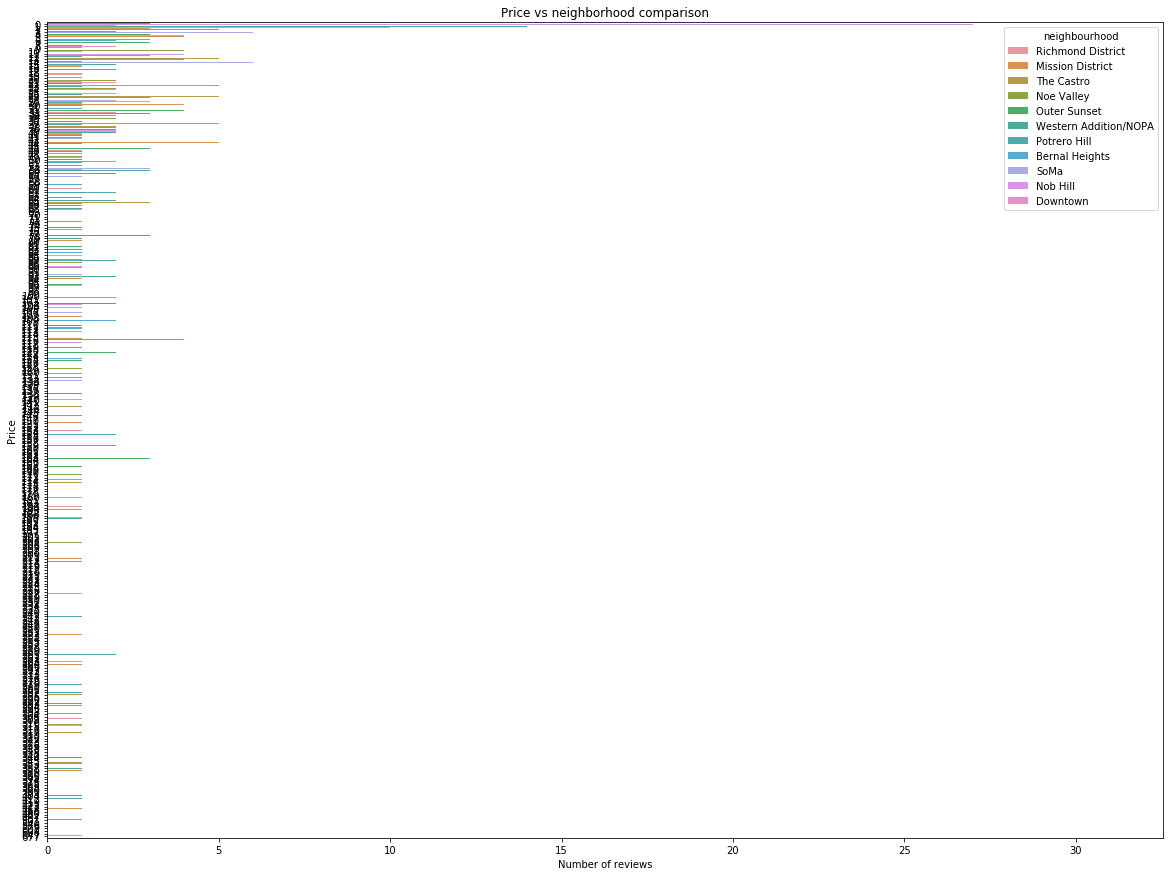

In [45]:
df_superhost_sorted = df_superhost_sorted.loc[(df_superhost_sorted['neighbourhood'] == 'Mission District') | \
                           (df_superhost_sorted['neighbourhood'] == 'SoMa') |\
                           (df_superhost_sorted['neighbourhood'] == 'Western Addition/NOPA') | \
                           (df_superhost_sorted['neighbourhood'] == 'Bernal Heights') | \
                           (df_superhost_sorted['neighbourhood'] == 'Richmond District') | \
                             (df_superhost_sorted['neighbourhood'] == 'Noe Valley') | \
                           (df_superhost_sorted['neighbourhood'] == 'Outer Sunset') | \
                           (df_superhost_sorted['neighbourhood'] == 'The Castro') | \
                            (df_superhost_sorted['neighbourhood'] ==  'Downtown') | \
                           (df_superhost_sorted['neighbourhood'] == 'Nob Hill') | \
                            (df_superhost_sorted['neighbourhood'] == 'Potrero Hill')]

plt.figure(figsize = (20,15))
sns.countplot(y = 'number_of_reviews', data = df_superhost_sorted, hue = 'neighbourhood', orient  = 'h')
plt.xlabel ('Number of reviews')
plt.ylabel ('Price')
plt.title ('Price vs neighborhood comparison')
ax1.grid(False)
plt.axis('on')

Cancellation policy with Superhosts and non-superhosts

In [46]:
df_superhost['cancellation_policy'].describe()

count         2932
unique           6
top       moderate
freq          1446
Name: cancellation_policy, dtype: object

In [47]:
df_superhost['cancellation_policy'].isna().value_counts()

False    2932
Name: cancellation_policy, dtype: int64

There are no missing values in cancellation policy and there are 2932 entries. 
Checking the unique values of 'cancellation policy' for superhost

In [48]:
df_superhost['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'super_strict_60', 'strict'], dtype=object)

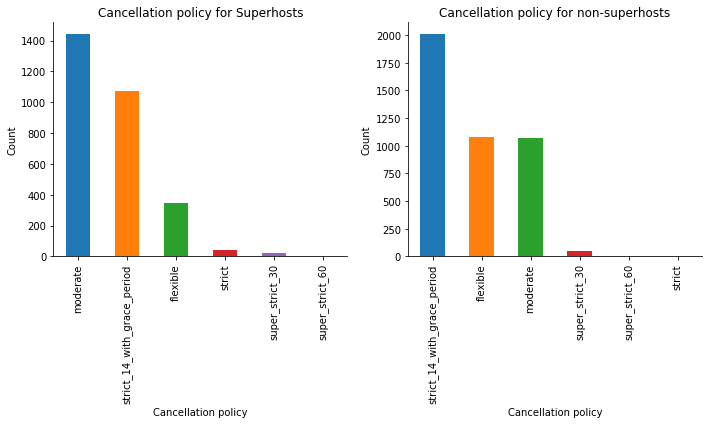

In [49]:
plt.subplot(1,2,1)
ax6 = df_superhost['cancellation_policy'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Cancellation policy for Superhosts")
ax6.set_xlabel("Cancellation policy")
ax6.set_ylabel("Count")
ax6.grid(False)
plt.axis('on')

plt.subplot(1,2,2)
ax7 = df_nonsuperhost['cancellation_policy'].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Cancellation policy for non-superhosts")
ax7.set_xlabel("Cancellation policy")
ax7.set_ylabel("Count")
ax7.grid(False)
plt.axis('on')
plt.tight_layout()
sns.despine()


As seen above, although the requirement of Zero cancellations (with exceptions)exist as a part of Airbnb policy,<br/>
majority of the cancellation policy is 'moderate' as opposed to 'strict with grace period' for non-superhosts

#### Price per night - segregating on type of accommodation

In [50]:
df1.accommodates.describe()

count    7151.000000
mean        3.200951
std         1.914692
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

The dataset has a minimum accommodation for 1 person and max for 16 persons with mean at 3 persons<br/>
No null values observed in accommodates column

In [51]:
df1.accommodates.value_counts().sort_values()

13       1
16       3
14       4
15       7
11       7
12      19
9       22
10      44
7       95
8      174
5      322
6      569
3      583
1      629
4     1461
2     3211
Name: accommodates, dtype: int64

The maximum number of properties can accommodate 2 persons. It is clear that values above 10 are outliers<br/>
with very less number of properties being able to accommodate such large parties.

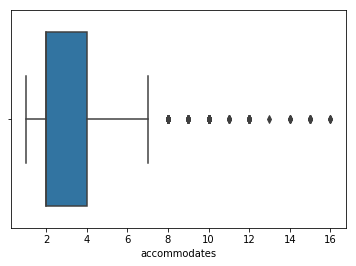

In [52]:
sns.boxplot(df1['accommodates'])
plt.show()

#### Classifying the price as per type of property
#### Apartment/Entire home/Apt and accommodates 2-15 people

In [53]:
df2 = df1.loc[df1['price']< 1000]

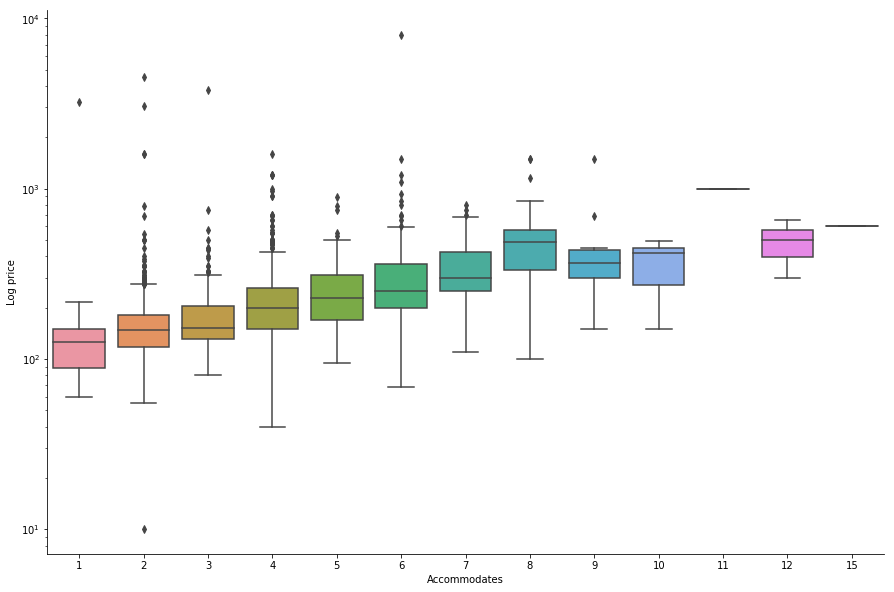

In [54]:
fig= plt.subplots(figsize=(15,10))
df_price =df1.loc[(df1['property_type'] == 'Apartment') & (df1['room_type'] == 'Entire home/apt') ]
sns.boxplot(y = 'price', x = 'accommodates', data = df_price,  orient = 'v')
plt.yscale('log')
plt.xlabel ('Accommodates')
plt.ylabel ('Log price')
sns.despine()


There appears to be a linear correlation between the number of people that the property can accommodate and the price

Filtering the price to less than $1000 and replotting the above boxplots as violin plots

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2160x1440 with 0 Axes>

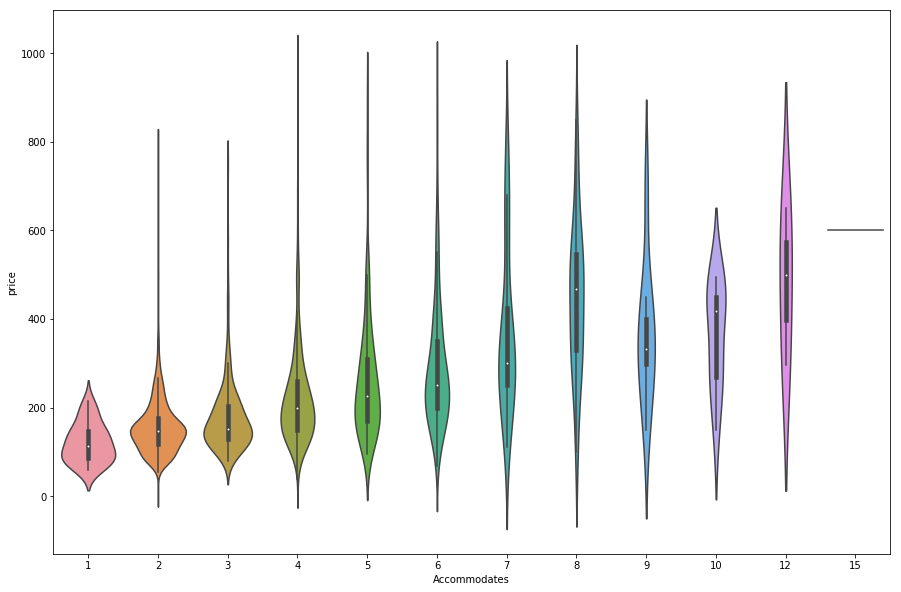

<Figure size 2160x1440 with 0 Axes>

In [55]:
fig= plt.subplots(figsize=(15,10))
df_price_1000=df2.loc[(df1['property_type'] == 'Apartment') & (df1['room_type'] == 'Entire home/apt') ]  #df2 has filtered price
sns.violinplot(y = 'price', x = 'accommodates', data = df_price_1000,  orient = 'v')
plt.xlabel ('Accommodates')
plt.ylabel ('price')
plt.figure(figsize =(30,20))


Above plot shows a better correlation between the accommodates and price

#### Visualizing box plots grouped by type of accommodation - filtering only the listings based on most common type of accommodations

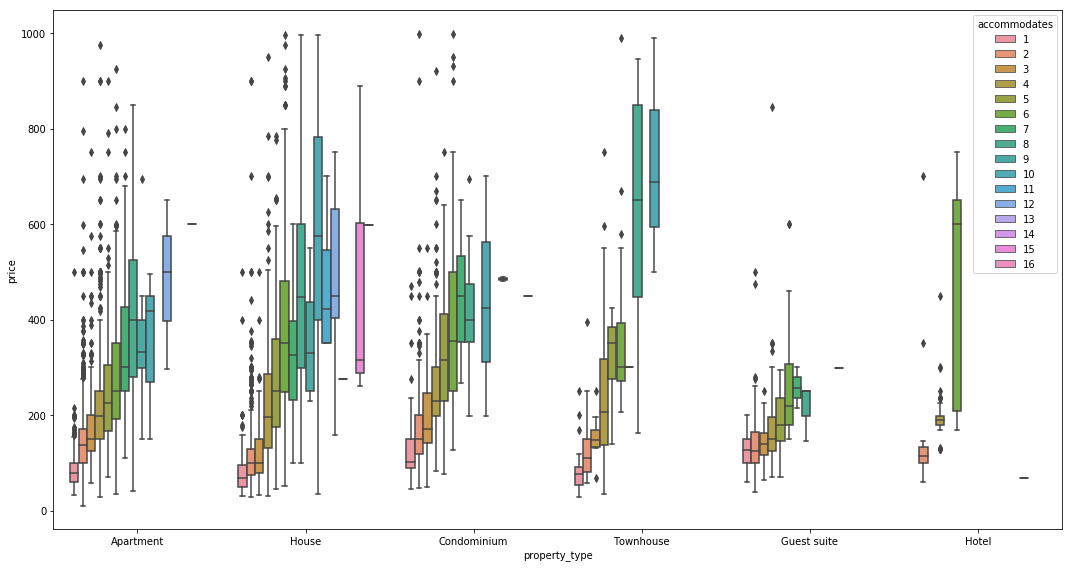

In [56]:
df3 = df2.copy(deep = True)


df4 = df3.loc[(df3['property_type'] == 'Apartment') | (df3['property_type'] == 'House') | (df3['property_type'] \
              == 'Condominium') | (df3['property_type'] == 'Guest suite') | (df3['property_type'] == 'Townhouse') | \
             (df3['property_type'] == 'Boutique hotel') & (df3['property_type'] == 'Hostel') \
              | (df3['property_type'] == 'Hotel')]


fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='property_type',y='price',data=df4,hue='accommodates')
plt.tight_layout()

#### Plotting Neighborhood vs accommodation with price as variable (top 10 neighborhoods)

In [57]:
df5 = df2.loc[(df2['neighbourhood'] == 'Mission District') | \
              (df2['neighbourhood'] == 'SoMa') | \
              (df2['neighbourhood'] == 'Western Addition/NOPA') | \
              (df2['neighbourhood'] == 'Bernal Heights') | \
              (df2['neighbourhood'] == 'Richmond District') | \
              (df2['neighbourhood'] == 'Outer Sunset') | \
              (df2['neighbourhood'] == 'Noe Valley') | \
              (df2['neighbourhood'] == 'The Castro') | \
              (df2['neighbourhood'] == 'Downtown') | \
              (df2['neighbourhood'] == 'Nob Hill')  ]
              
df5.shape

(3870, 94)

In [58]:
df3.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Guest suite',
       'Loft', 'Cottage', 'Hostel', 'Guesthouse', 'Serviced apartment',
       'Bungalow', 'Boutique hotel', 'Bed and breakfast', 'Hotel', 'Boat',
       'Other', 'Tiny house', 'Resort', 'Villa', 'Aparthotel',
       'Timeshare', 'In-law', 'Cabin', 'Treehouse', 'Castle',
       'Earth house'], dtype=object)

#### Correlation heatmap of listings dataframe

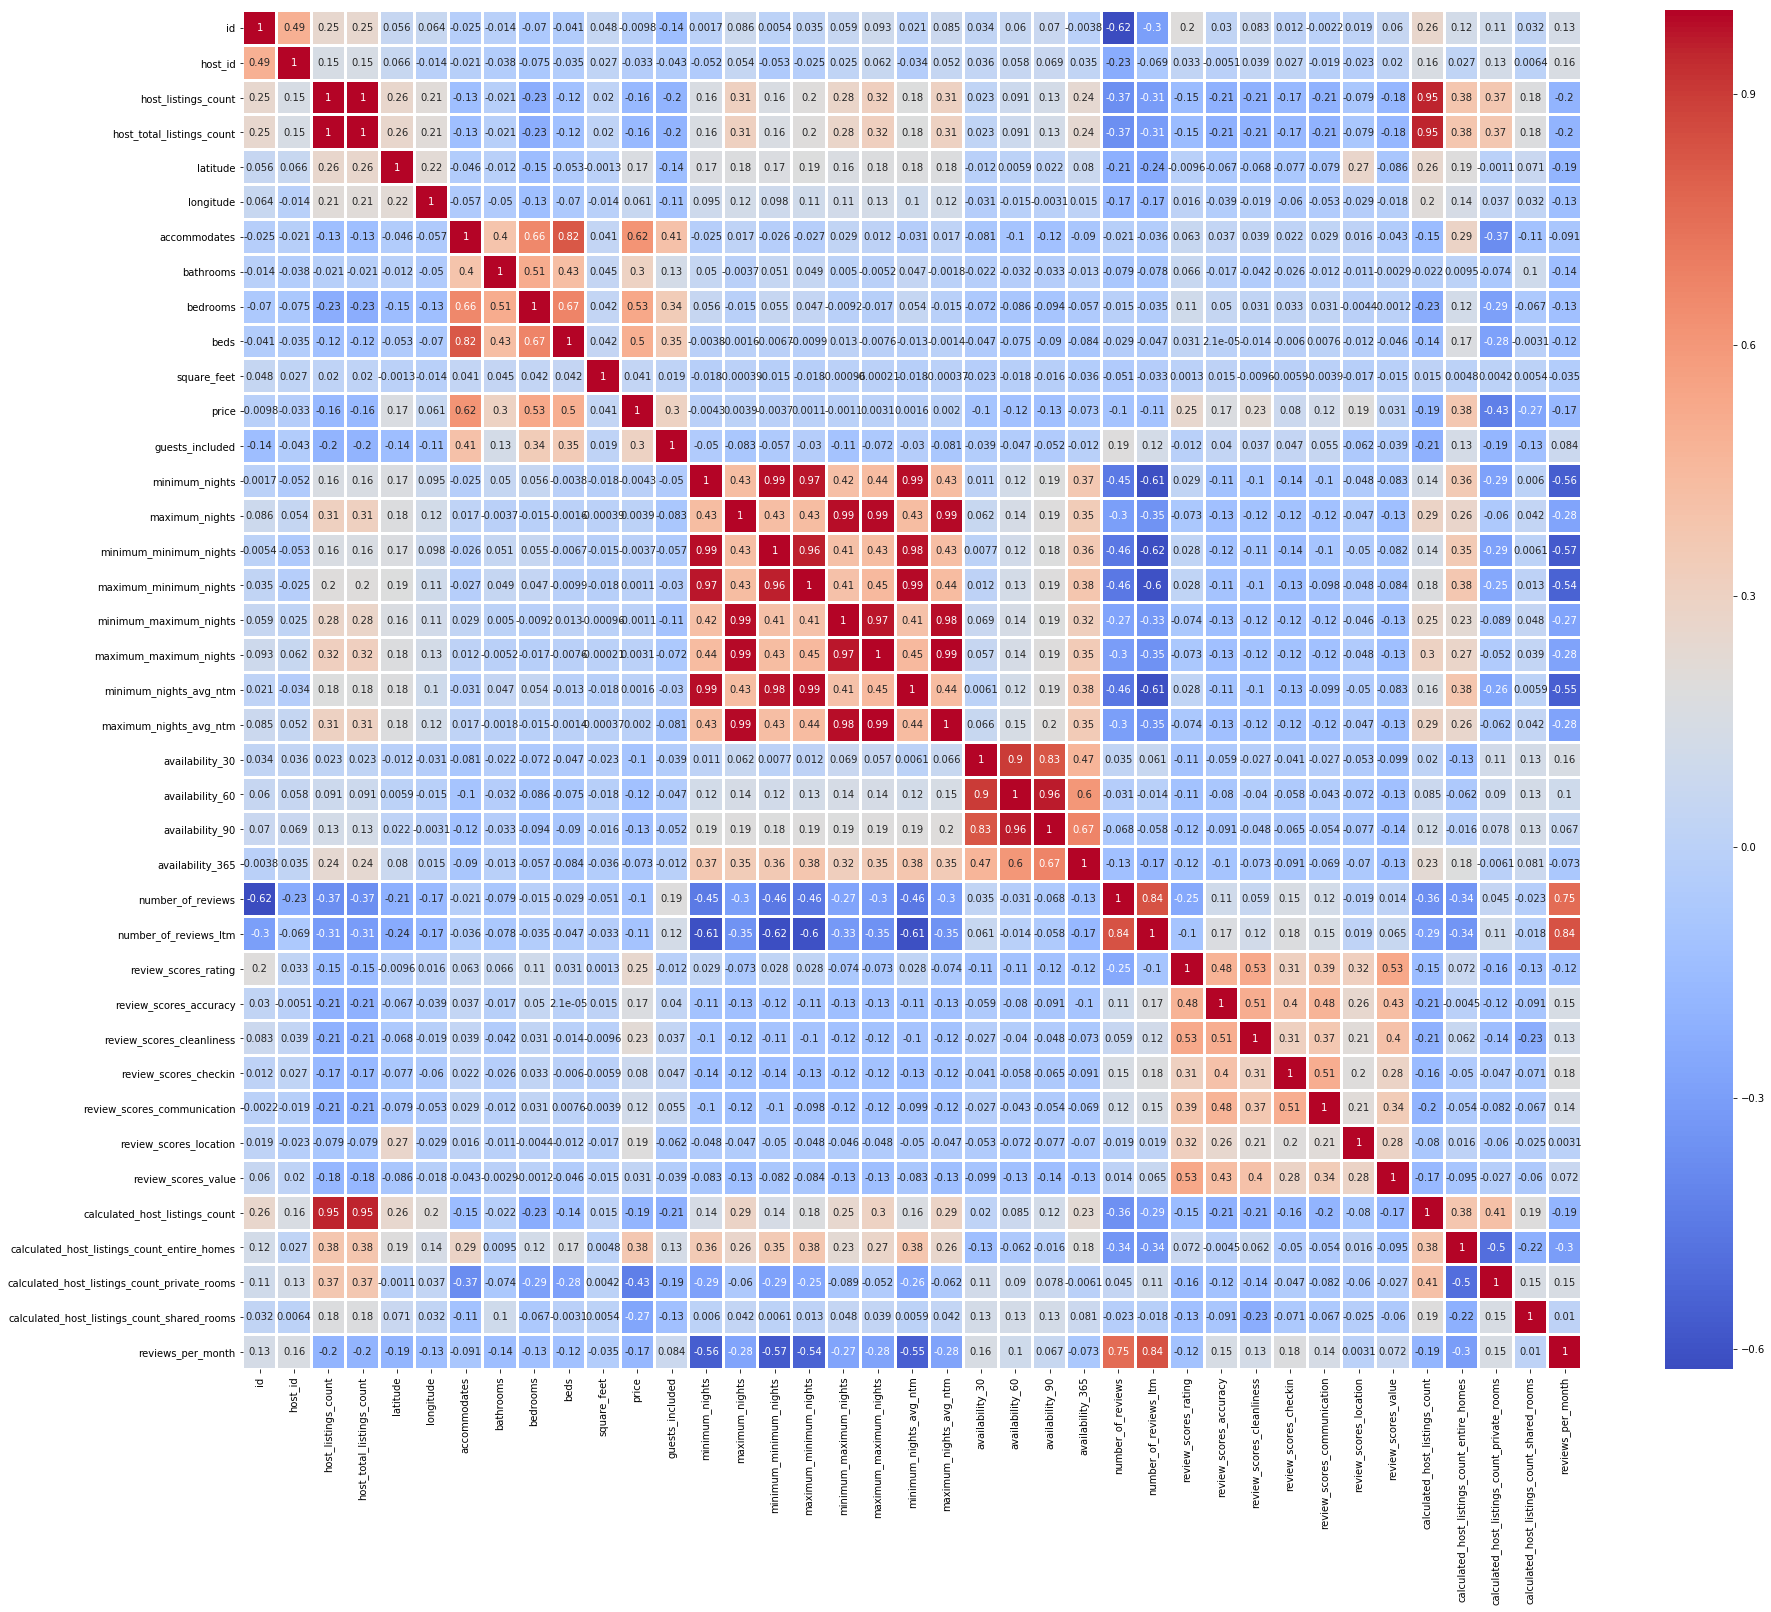

In [59]:
plt.figure(figsize =(30,25))
sns.heatmap(df2.corr(method = 'spearman'), annot = True, cmap = 'coolwarm', linewidth =2 )

Visualizing the pricing in violinplot

[Text(0.5, 1.0, "Violin Plot of 'Price' Series")]

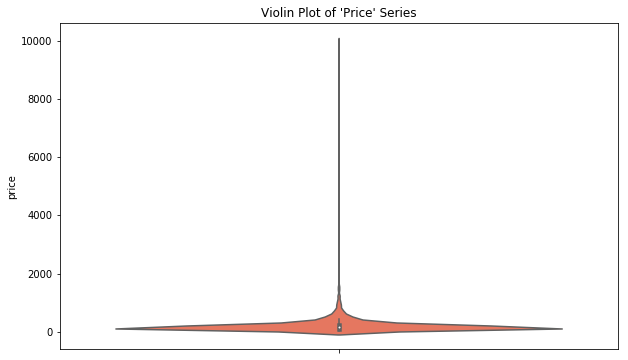

In [60]:
plt.figure(figsize= (10,6))
ax8 = sns.violinplot(y=df1['price'],palette = 'Reds')
ax8.set(title="Violin Plot of 'Price' Series")

Visualizing same plot using df2 (pricing filtered to less than 1000 dollars)

[Text(0.5, 1.0, "Violin Plot of 'Price' Series")]

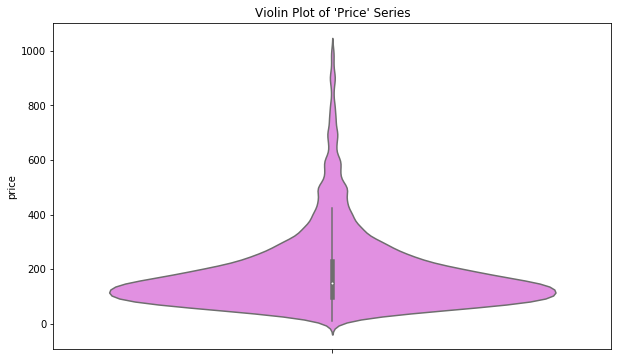

In [61]:
plt.figure(figsize= (10,6))
ax9 = sns.violinplot(y=df2['price'],color = 'Violet')
ax9.set(title="Violin Plot of 'Price' Series")

As we see from the above plot, the maximum number of properties are with nightly rate approximately around 180 dollars

In [62]:
df_apartment =df1.loc[(df1['property_type'] == 'Apartment')]
df_house =df1.loc[(df1['property_type'] == 'House')]
df_condo =df1.loc[(df1['property_type'] == 'Condominium')]
print('The average nightly price of an Apartment is:', df_apartment['price'].mean())
print('The average nightly price of a House is:', df_house['price'].mean())
print('The average nightly price of a Condominium is:', df_condo['price'].mean())

The average nightly price of an Apartment is: 195.14769332890808
The average nightly price of a House is: 224.49698492462312
The average nightly price of a Condominium is: 302.0880420499343


In [63]:
#### Displaying the properties on Map

In [64]:
 latitude = 37.7749               # Lat, long values of San Francisco 
longitude =  -122.4194

# creating map using folium 
sf_map = folium.Map(location=[latitude, longitude],tiles="cartodbpositron",zoom_start=12)

sf_map

In [65]:
sf_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist()))

sf_map

In [66]:

# for lat, lon, name, accom, bedrm, nbrhd in zip(df1['latitude'], df1['longitude'],df1['name'],df1['accommodates'], df1['bedrooms'], df1['neighbourhood']):
#     label = folium.Popup(str(name) + 'bedrooms:'+str(bedrm) + 'Accomodates:', accom, 'neighborhood:' + str(nbrhd))
#     folium.CircleMarker(
#         [lat, lon],
#         radius=5,
#         popup=label,
#         fill=True,
#         fill_opacity=0.7).add_to(sf_map)

       
# sf_map

#### Availability of a property

In [67]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,138619,2019-03-06,f,$160.00,$160.00,30,30
1,958,2019-03-06,f,$158.00,$158.00,1,30
2,958,2019-03-07,f,$158.00,$158.00,1,30
3,958,2019-03-08,f,$156.00,$156.00,1,30
4,958,2019-03-09,f,$154.00,$154.00,1,30


In [68]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610115 entries, 0 to 2610114
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 139.4+ MB


In [69]:
df_calendar['listing_id'].nunique()

7151

In [70]:
df_calendar['available'].describe()

count     2610115
unique          2
top             f
freq      1536328
Name: available, dtype: object

In [71]:
print(df_calendar['date'].max(),',', df_calendar['date'].min())

2020-03-04 , 2019-03-06


The date range is between 6 Mar 2019 to 4 Mar 2020

Finding the percentage of availability for all the properties/

In [72]:
df_calendar['available'].value_counts()/len(df_calendar['available'])*100


f    58.860548
t    41.139452
Name: available, dtype: float64

Text(0, 0.5, 'Count')

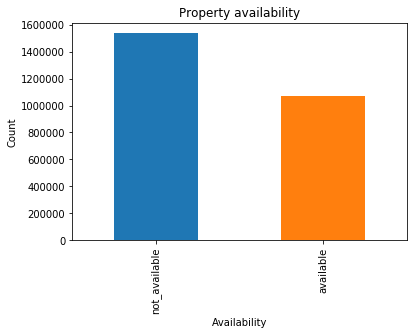

In [73]:
df_calendar['available'] = df_calendar['available'].replace('f', 'not_available')
df_calendar['available'] = df_calendar['available'].replace('t', 'available')

ax10 =df_calendar['available'].value_counts().plot(kind = 'bar', title = 'Property availability')
ax10.set_xlabel('Availability')
ax10.set_ylabel('Count')

The average property availablity over the entire year is 41.1%

Average income per month for all properties in SF

In [74]:
df_calendar['available'].value_counts()

not_available    1536328
available        1073787
Name: available, dtype: int64

In [75]:
 print('The percentage of booked properties is ', 1536328/(1073787+1536328)*100)

The percentage of booked properties is  58.860548290017874


In [76]:
print('The average nightly rate of a property in SF is:', df2['price'].mean())

The average nightly rate of a property in SF is: 191.36625106262397


In [77]:
print('Average income per month in SF is:', ((58.860548290017874/(100*12))*365*df2['price'].mean()))

Average income per month in SF is: 3426.109748782676


In [78]:
print('Avg income per month for an Apartment in SF is:', ((58.860548290017874/(100*12))*365*df_apartment['price'].mean()))
print('Avg income per month for a House in SF is:', ((58.860548290017874/(100*12))*365*df_house['price'].mean()))
print('Avg income per month for a Condominiumin SF is:', ((58.860548290017874/(100*12))*365*df_condo['price'].mean()))


Avg income per month for an Apartment in SF is: 3493.8104856735035
Avg income per month for a House in SF is: 4019.263085061255
Avg income per month for a Condominiumin SF is: 5408.4081185206205


check the availability of apartment, house condo values and recalculate above

In [79]:
# (merged_df1['property_type'] == 'Apartment').value_counts()
# # (merged_df1['available']== 'not_available') & (

In [80]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [81]:
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].str.replace(',', '')
df_calendar['price'] = df_calendar['price'].astype(float)

Availability vs superhost
availability vs ratings


#### Average price across listings for the entire year

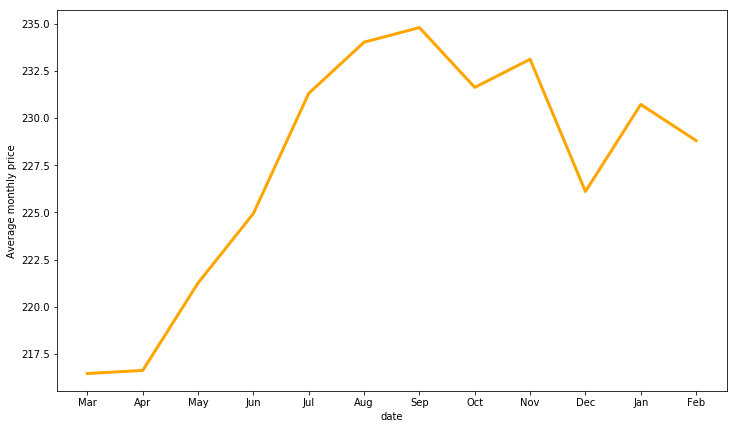

In [82]:
monthly_average = df_calendar.groupby(df_calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
monthly_average.plot(kind = 'line' , figsize = (12,7), linewidth = 3, color = 'orange')               #replaced bar with line for better visualization
labels = "Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan Feb".split()  # replace manual labels
ticks = list(range(0, 12, 1))          
plt.xticks(ticks, labels)
plt.ylabel('Average monthly price')
plt.show()

#### The above graph shows steady increase in price from April to september, a dip in October and then showing an increase in November and January 

### Pricing during the week

Converting date to Weekdays

In [83]:
df_calendar['dayofweek'] = df_calendar['date'].dt.weekday_name
#cat = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week = df_calendar[['dayofweek','price']]
price_week = price_week.groupby(['dayofweek']).mean()
price_week


,price
dayofweek,
Friday,230.778183
Monday,226.237231
Saturday,230.789344
Sunday,226.189823
Thursday,226.221300
Tuesday,226.168500
Wednesday,226.199465


Average price per day of the week

([<matplotlib.axis.XTick at 0x1a42b0e550>,
 <a list of 7 Text xticklabel objects>)

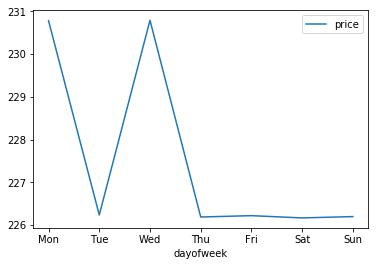

In [84]:
price_week.plot()
labels = "Mon Tue Wed Thu Fri Sat Sun".split()
ticks = list(range(0, 7, 1))
plt.xticks(ticks, labels)

#### Monday and Wednesdays have the maximum price while Tuesday and Friday to Sunday have the least values


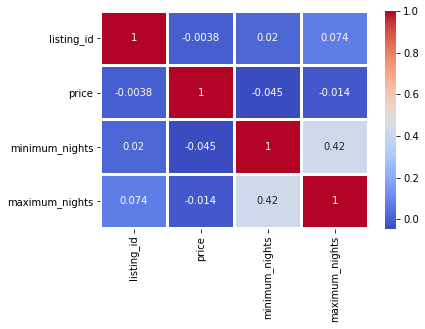

In [85]:
sns.heatmap(df_calendar.corr(method = 'spearman'), annot = True, cmap = 'coolwarm', linewidth =2 )

#### Availability throughout the year

In [86]:
# df_calendar['booked'] = df_calendar['available'].apply(lambda x: 0 if x=='t' else 1)
# df_calendar['booked'].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


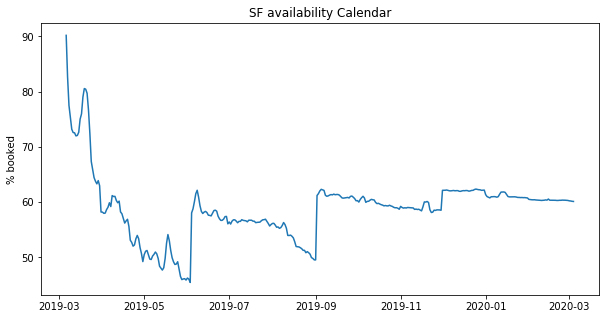

In [87]:
calendar_new = df_calendar[['date', 'available']]
calendar_new['booked'] = calendar_new.available.map( lambda x: 0 if x == 'available' else 100)
calendar_new = calendar_new.groupby(['date'])['booked'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['booked'])
plt.title('SF availability Calendar')
plt.ylabel('% booked')
plt.show()

##### Assigned 100 for 'not available' and 0 for 'available'<br/>

#### Following is observed from the above graph :<br/>
#### •	Major drop in bookings(increase in availability) observed from March to June<br/>
#### •	Bookings shoot up in June, only to drop by August<br/>
#### •	Number of bookings grow again in September and the trend remains fairly constant until next March


 

In [88]:
# df_calendar = df_calendar.set_index(['date'])

#### Availability by neighborhood <br/>
Merging listings dataframe with df_calendar dataframe (inner join) to acquire availability for all properties by neighborhood

In [89]:
merged_df1 = pd.merge(df1, df_calendar, how = 'inner', left_on = 'id', right_on = 'listing_id')

In [90]:
availability = merged_df1[['neighbourhood', 'available']]

In [91]:
availability.head()

,neighbourhood,available
0,Duboce Triangle,not_available
1,Duboce Triangle,not_available
2,Duboce Triangle,not_available
3,Duboce Triangle,not_available
4,Duboce Triangle,not_available


In [92]:
availability['available'] = availability['available'].apply(lambda a:0 if a=='f' else 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
availability.head()

,neighbourhood,available
0,Duboce Triangle,1
1,Duboce Triangle,1
2,Duboce Triangle,1
3,Duboce Triangle,1
4,Duboce Triangle,1


In [94]:
df_availability = pd.DataFrame(availability.groupby(['neighbourhood'])['available'].count().sort_values().reset_index())

Verifying correlation of numerical variables in the dataframe


In [95]:
df_cor = merged_df1[['price_x', 'bedrooms', 'accommodates', 'review_scores_rating']]

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


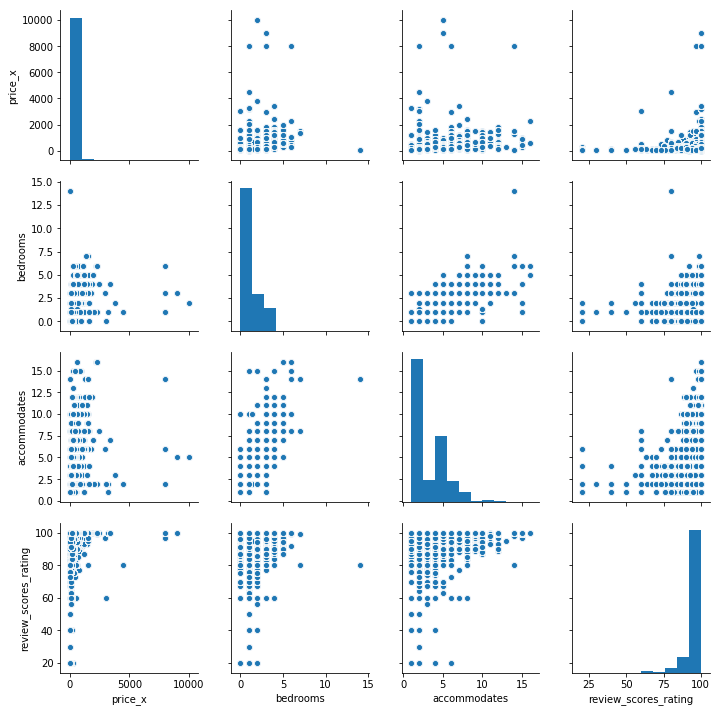

In [96]:
sns.pairplot(df_cor)

It is seen from the above that bedrooms and accommodates have correlation 

Price vs availability


In [97]:
df_availability_price = merged_df1[['neighbourhood', 'available', 'price_x']]

In [98]:
df_availability_price.head()

,neighbourhood,available,price_x
0,Duboce Triangle,not_available,170.0
1,Duboce Triangle,not_available,170.0
2,Duboce Triangle,not_available,170.0
3,Duboce Triangle,not_available,170.0
4,Duboce Triangle,not_available,170.0


In [99]:
df_final = pd.DataFrame(df_availability_price.groupby(['neighbourhood']).agg({'available':'count', 
                         'price_x':'mean'}).sort_values(by = 'available').reset_index())
df_final

,neighbourhood,available,price_x
0,Japantown,365,380.000000
1,Presidio,365,105.000000
2,Sea Cliff,1095,1653.333333
3,Daly City,1825,49.200000
4,West Portal,4380,157.416667
5,Forest Hill,5475,254.400000
6,Diamond Heights,8395,206.869565
7,Civic Center,8760,169.666667
8,Presidio Heights,11315,337.290323
9,Dogpatch,11315,340.225806


(263.29624056863304, 347614.15796245815, 41.27067580144236, 1970.9721057982406)

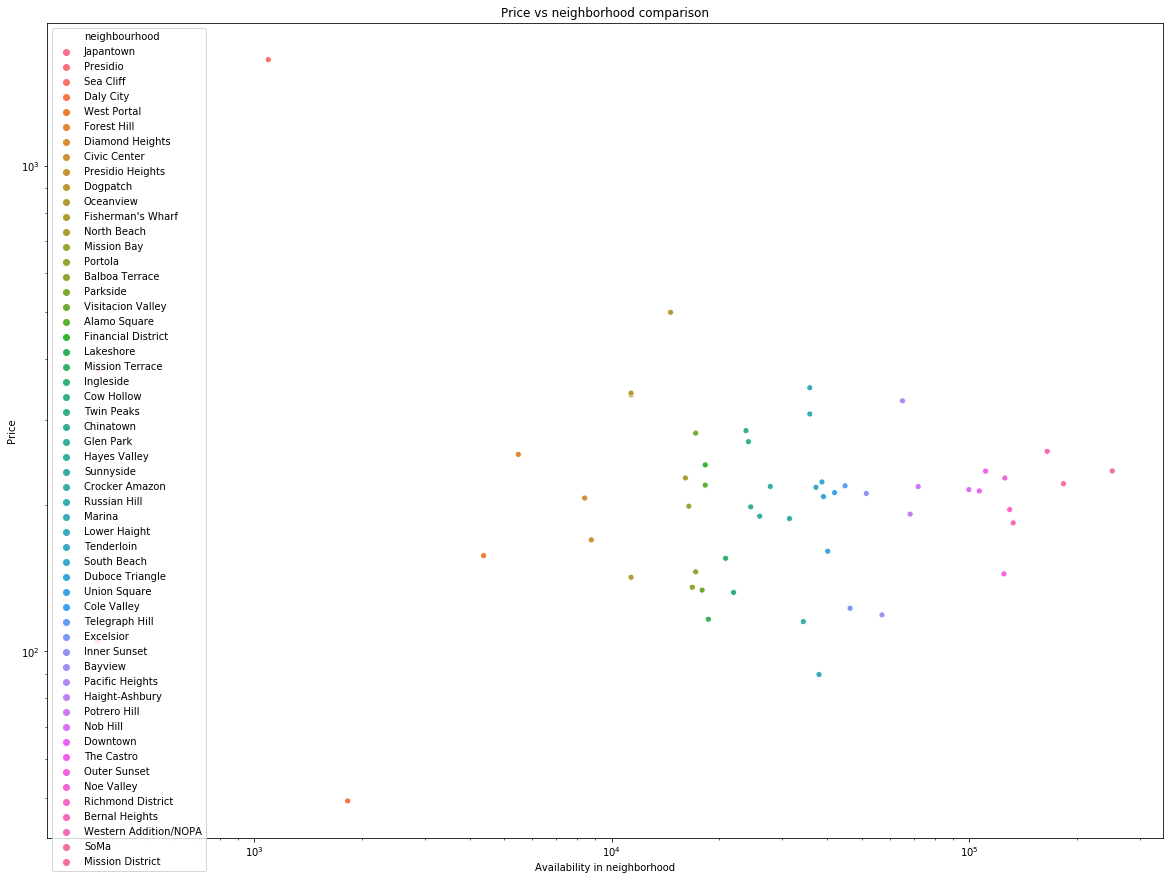

In [100]:
plt.figure(figsize = (20,15))
sns.scatterplot(x ='available', y = 'price_x', data = df_final, hue = 'neighbourhood')
plt.xlabel ('Availability in neighborhood')
plt.ylabel ('Price')
plt.xscale('log')
plt.yscale('log')
plt.title ('Price vs neighborhood comparison')
ax1.grid(False)
plt.axis('on')

Above graph shows weak correlation between price and availability of accommodation in neighborhoods

Review scores rating vs neighborhood

In [101]:
df1['review_scores_rating'].value_counts()

100.0    1604
98.0      678
99.0      617
97.0      597
96.0      419
95.0      348
93.0      249
94.0      234
90.0      168
92.0      141
80.0      125
91.0      108
89.0       71
87.0       66
88.0       58
60.0       44
86.0       41
85.0       27
70.0       21
84.0       20
83.0       16
82.0       14
76.0        8
20.0        8
40.0        6
75.0        6
77.0        6
78.0        5
73.0        5
81.0        5
67.0        4
74.0        2
79.0        2
50.0        2
30.0        1
72.0        1
63.0        1
56.0        1
64.0        1
Name: review_scores_rating, dtype: int64

(0.0, 1641.15, -0.5, 38.5)

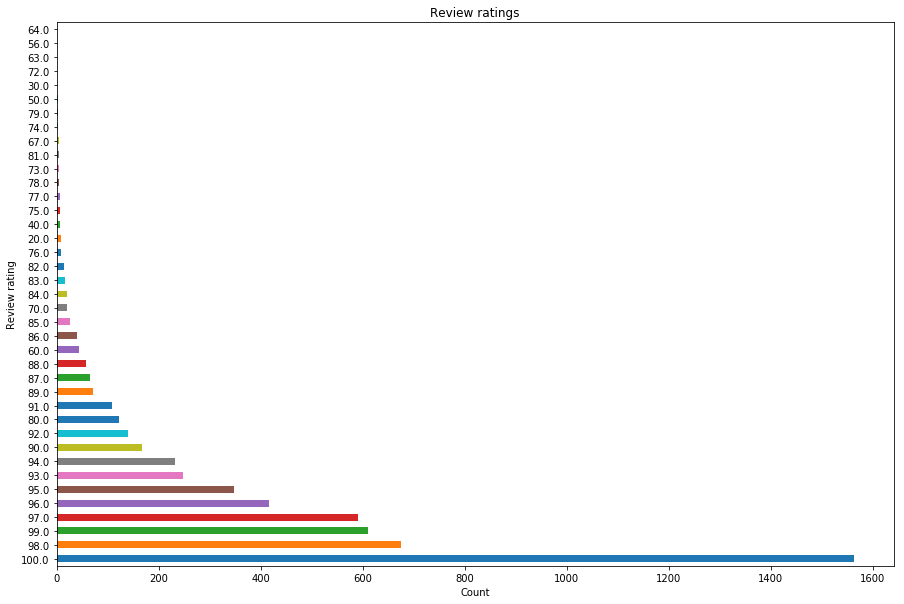

In [102]:
ax12 = df2['review_scores_rating'].value_counts().plot(kind='barh',
                                    figsize=(15,10),
                                    title="Review ratings")
ax12.set_xlabel("Count")
ax12.set_ylabel("Review rating")
ax1.grid(False)
plt.axis('on')
# sns.countplot(x = 'neighbourhood', y = 'review_scores_rating', data = df2)

Taking the top 10 neighborhoods (df5) and comparing it with review score rating, filtering review_score_Rating values greater than 80

(-0.5, 19.5, 0.0, 166.95)

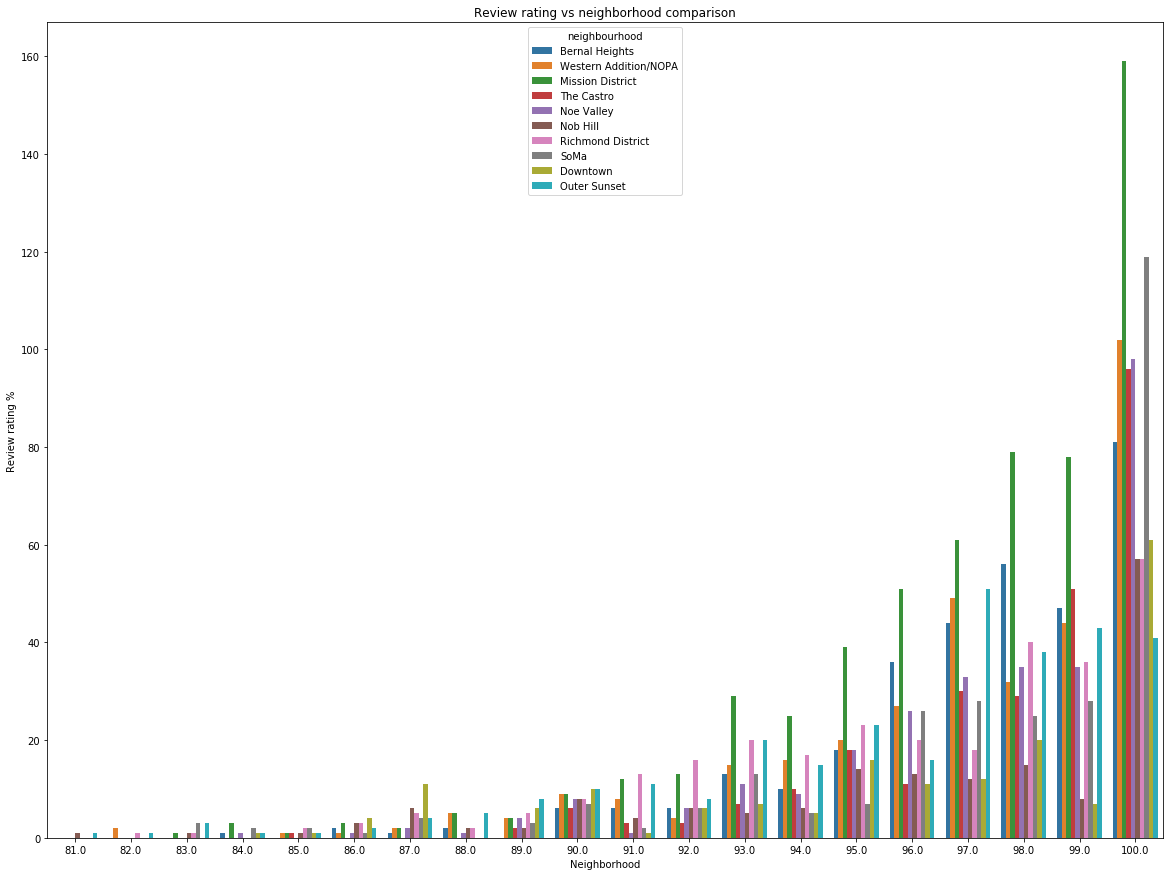

In [103]:
df5 = df5.loc[df5['review_scores_rating'] >80]

plt.figure(figsize = (20,15))
sns.countplot(x = 'review_scores_rating', data = df5, hue = 'neighbourhood', orient  = 'v')
plt.xlabel ('Neighborhood')
plt.ylabel ('Review rating %')
plt.title ('Review rating vs neighborhood comparison')
ax1.grid(False)
plt.axis('on')

Mission district has the maximum number of 100% review scores. For review scores greater than 90%,<br/>
Mission district properties have the maximum number of ratings compared to other neighbourhoods.


Visualizing the following properties on Map :
    1. properties which are Apartments/House/condominiums
    2. Properties with highest review scores
    3. Superhost properties
    4. Properties with minimum average price 

## Inferential Statistics

There are several variables which have high degree of correlation as per the heat map plotted above. 
The p-values are checked using Hypothesis testing to see how well the data (variables) are correlated

In [104]:
df2.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_m

For finding Correlation between continous and categorical variable we have the following statistical functions available :

**•	scipy.stats.levene** - Performs Levene test for equal variances. returns W and p<br/>
**•	stats.kruskal** - Computes the Kruskal-Wallis H-test for independent samples. Returns stat and p<br/>
**•	stats.pointbiserialr** - Calculates a point biserial correlation coefficient and the associated p-value.Assumes normality and homoscedasticity. <br/>
**•	stats.mannwhitneyu** - Returns statistic and p value (Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks.)<br/>
**stats.spearmanr** for non-parametric measure of rank correlation


#### Verifying if the price variable is normally distributed 

In [105]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y


In [106]:
price_mean = np.mean(df2['price'])
price_std = np.std(df2['price'])

sample = np.random.normal(price_mean, price_std, size=1000000)

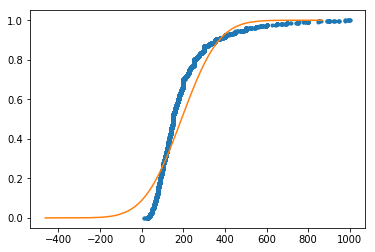

In [107]:
x_act, y_act = ecdf(df2['price'])
x_sample, y_sample = ecdf(sample)
_ = plt.plot(x_act, y_act, linestyle = 'none', marker = '.')
_ = plt.plot(x_sample, y_sample)
plt.show()

As the ECDF of price is not distributed normally, we **cannot use point-biserial correlation** (which assumes that 
the continuous variable is normally distributed). Instead, we can use kruskal Wallis H test for comparing
categorical vs continuous variable

#### Additional check for normality

In [108]:
stat, p = shapiro(df2['price'])
p

/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

As the p-value is 0 (less than conventional 0.05), the Null hypothesis test that the distribution is normal needs to be rejected

Refering to the above, the functions that can be applied are **Kruskal-Wallis**, **levene** and **mannwhitneyu**

**The hypothesis statements are:**

Null Hypothesis: The distributions for the category are equal <br/>
Alternative Hypothesis: The distributions for the category are not equal

$$\alpha = 0.05$$

In [109]:
alpha = 0.05

# Testing for variables host_is_superhost and price

d0 = df2[df2['host_is_superhost'] == 'f']["price"]
d1 = df2[df2['host_is_superhost'] == 't']["price"]


stat, p = stats.mannwhitneyu(d0, d1)

if p > alpha:
    print('Distribution for the category are not equal as p-value is greater than alpha')
    print('We reject Null hypothesis')
else:
        print('Distribution for the category is equal as p-value is less than alpha')
        print('We fail to reject null Hypothesis')



Distribution for the category is equal as p-value is less than alpha
We fail to reject null Hypothesis


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4911: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [110]:

# # Testing for variables has_availability and price

# d0 = df2[df2['has_availability'] == 'f']["price"]
# d1 = df2[df2['has_availability'] == 't']["price"]


# stat, p = stats.mannwhitneyu(d0, d1)

# if p > alpha:
#     print('Distribution for the category are not equal as p-value is greater than alpha')
#     print('We reject Null hypothesis')
# else:
#         print('Distribution for the category is equal as p-value is less than alpha')
#         print('We fail to reject null Hypothesis')

For variables greater than 2, we use Spearman rank correlation

**Null hypothesis** = There is no correlation between the category and price<br/>
**Alternate hypothesis** = There IS correlation between the category and price

In [111]:
categories = ['property_type','room_type','cancellation_policy','accommodates',\
            'guests_included','extra_people','minimum_nights', 'host_is_superhost', 'neighbourhood']

for category in categories:
    rho, p = stats.spearmanr(df2[category], df2['price'])
    print('\n--------------------')
    print(category, '\n--------------------')
    print('Spearman R:', rho)
    print('P-Value:' , p)
#     if p > alpha:
#         print("Correlation exists with Price (do NOT reject null hypothesis)\n")
#     else:
#         print("Correlation does not exist with price (reject null hypothesis)\n")
    if rho >0:
        if rho > 0.5:
            print("Strong positive correlation exists with Price, Correlation coefficient:", rho)
        else:
            print("Weak positive correlation exists with Price, Correlation coefficient:", rho)
    else:
        if rho< -0.5:
            print('Strong negative correlation exists with Price, Correlation coefficient:', rho)
        else:
            print("Weak Negative correlation exists with Price, Correlation coefficient: ", rho)



--------------------
property_type 
--------------------
Spearman R: -0.017622217304396035
P-Value: 0.1387855355081651
Weak Negative correlation exists with Price, Correlation coefficient:  -0.017622217304396035

--------------------
room_type 
--------------------
Spearman R: -0.5544925941976808
P-Value: 0.0
Strong negative correlation exists with Price, Correlation coefficient: -0.5544925941976808

--------------------
cancellation_policy 
--------------------
Spearman R: 0.12052092068698528
P-Value: 2.976915480751123e-24
Weak positive correlation exists with Price, Correlation coefficient: 0.12052092068698528

--------------------
accommodates 
--------------------
Spearman R: 0.6150170705647
P-Value: 0.0
Strong positive correlation exists with Price, Correlation coefficient: 0.6150170705647

--------------------
guests_included 
--------------------
Spearman R: 0.30121953673647983
P-Value: 5.7697698223636554e-148
Weak positive correlation exists with Price, Correlation coefficient

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [112]:
# # df_calendar.columns
# category = ['available','dayofweek']
 
# for category in categories:
#     rho1, p1 = stats.spearmanr(df_calendar[category], df_calendar['price_x'])
#     print(category, '\n--------------------')
#     print('Spearman R:', rho1)
#     print('P-Value:' , p1)
#     if p1 > alpha:
#         print("Distribution is the same (do NOT reject null hypothesis)\n")
#     else:
#         print("Distribution is NOT the same (reject null hypothesis)\n")

In [113]:
merged_df1.head()

,id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_x,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,dayofweek
0,958,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,superhost,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1009.785714,170.0,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,today,t,1,1,2,64,2019-03-06,180,52,2009-07-23,2019-02-17,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1,0,0,1.54,958,2019-03-06,not_available,158.0,$158.00,1,30,Wednesday
1,958,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,superhost,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1009.785714,170.0,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.

With the above statistical test, following categorical variables are seen having correlation with price. These independent <br/>
variables can be used for predicting the price in the later part of the project

**•	number_of_reviews<br/>
•	host_is_superhost<br/>
•	host_identity_verified<br/>
•	property_type<br/>
•	room_type<br/>
•	cancellation_policy<br/>
•	accommodates<br/>
•	guests_included<br/>
•	neighbourhood**


--------------------
property_type 
--------------------
Weak Negative correlation exists with Price, Correlation coefficient:  -0.017

--------------------
room_type 
--------------------
Strong negative correlation exists with Price, Correlation coefficient: -0.55

--------------------
cancellation_policy 
--------------------
Weak positive correlation exists with Price, Correlation coefficient: 0.12

--------------------
accommodates 
--------------------
Strong positive correlation exists with Price, Correlation coefficient: 0.61

--------------------
guests_included 
--------------------
Weak positive correlation exists with Price, Correlation coefficient: 0.30

--------------------
extra_people 
--------------------
Weak Negative correlation exists with Price, Correlation coefficient:  -0.017

--------------------
minimum_nights 
--------------------
Weak Negative correlation exists with Price, Correlation coefficient:  -0.004

--------------------
host_is_superhost 
--------------------
Weak positive correlation exists with Price, Correlation coefficient: 0.06

--------------------
neighbourhood 
--------------------
Weak positive correlation exists with Price, Correlation coefficient: 0.07

In addition to the above, following numberical variables observed having correlation with price:

**•	bedrooms<br/>
•	beds<br/>
•	Host is superhost<br/>
•	Square feet**
    
     

We will take the above variables into account while working on the model for price prediction

### Linear Regression

**Merging df2 (listings where price < $1000) with df_calendar and using it for the model (to avoid high value errors)**

In [125]:
merged_df2 = pd.merge(df2, df_calendar, how = 'inner', left_on = 'id', right_on = 'listing_id')

Filtering columns in dataframe for linear regression

In [156]:
columns = ["price_x", "host_is_superhost", \
         "host_identity_verified","property_type", "room_type",\
           "cancellation_policy","accommodates","guests_included",\
           "extra_people","minimum_nights_x", "bedrooms", \
           "square_feet","available", "dayofweek", "neighbourhood", 'zipcode'
        ]

ml_df = merged_df2[columns]

In [157]:
ml_df.columns

Index(['price_x', 'host_is_superhost', 'host_identity_verified',
       'property_type', 'room_type', 'cancellation_policy', 'accommodates',
       'guests_included', 'extra_people', 'minimum_nights_x', 'bedrooms',
       'square_feet', 'available', 'dayofweek', 'neighbourhood', 'zipcode'],
      dtype='object')

Converting Categorical variables using **.get_dummies()**

In [158]:
categories = [ 'property_type', 'room_type', 'cancellation_policy']

for category in categories:
    ml_df[category] = ml_df[category].astype("category")

new_df = pd.get_dummies(ml_df, drop_first=True)

X = new_df.drop(columns=['price_x'])
y = new_df[['price_x']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [159]:
print(X.isnull().sum().sum(), y.isnull().sum().sum())

0 0


In [160]:
print(X.shape, y.shape)

(2576170, 204) (2576170, 1)


#### Applying Train/Test Split and Cross Validation

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=42, stratify = y)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
                    
print('R^2: {}'.format(reg.score(X_test, y_test)))
      
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      
print('Root Mean Squared Error: {}'.format(rmse))

R^2: 0.5658262230734239
Root Mean Squared Error: 93.39885471144368


Using cross-validaiton to improve model accuracy (generalization)

In [133]:
cv_result = cross_val_score(reg, X_train, y_train, cv =5)
print(cv_result)
print('Average of 5 folds is :', np.mean(cv_result))

[0.56505256 0.56666117 0.56622627 0.568599   0.56471151]
Average of 5 folds is : 0.5662501029145537


**Plotting a scatter plot of Actual Vs predicted values**

Text(0.5, 1.0, 'True Vs Predicted value plot')

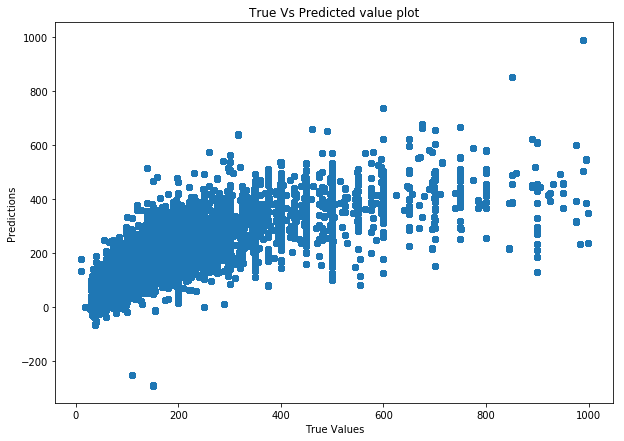

In [136]:
plt.figure(figsize = (10,7))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("True Vs Predicted value plot")

In [149]:
print('The intercept is {}, the coefficients are {}'. format(reg.intercept_, reg.coef_))

The intercept is [44.15630203], the coefficients are [[ 2.33527713e+01  3.73353615e+00 -5.35908162e-01  4.73966431e+01
  -4.76667218e+00  3.39368839e-02  8.97437843e+00  4.58911320e+00
  -3.28102679e+01  1.53867739e+01 -1.63722789e+02  2.23727431e+01
  -1.21110349e+01 -6.25621982e+01 -9.34966729e+01 -5.32990035e+00
   6.06940748e+00  1.40341274e+02 -2.84764795e+01 -1.29856470e+01
  -1.66191046e+01  1.79037372e+01  2.37946881e+00  4.98976810e+00
   3.32762942e+01  1.12044014e+01  1.47338567e+02 -5.84297209e+00
   4.65744515e+02  1.16283764e+01  1.91527822e+00  1.19328808e+01
   2.45945002e+01 -5.43961855e+01 -1.18786664e+02 -1.63011280e+00
  -9.20609050e+00  4.75931827e+00 -3.69111240e+01 -6.29995057e+01
  -3.89163300e+01  6.57470239e+01 -7.45577690e+01 -9.12770878e+01
   7.45446216e+01 -3.56547794e+01  8.83963755e+01  4.13259232e+01
   8.99951120e+00 -7.12412272e+01 -8.23208249e+01 -3.01788942e+01
   4.98733249e+01  2.37176673e-01 -9.37465989e+02  5.35907508e+07
   1.00792493e+02 -1.20

### Feature Engineering - Modifying features to eliminate multicollinearity, overfitting and improving R<sup>2

In [169]:
columns2 = ["price_x", "property_type",\
           "cancellation_policy","accommodates","guests_included",\
           "host_is_superhost", "bedrooms", \
            "dayofweek", "neighbourhood"
        ]

ml_df2 = merged_df1[columns2]

In [170]:
categories2 = ["property_type","cancellation_policy",\
           "host_is_superhost","dayofweek", "neighbourhood"
                ]

for category in categories2:
    ml_df2[category] = ml_df2[category].astype("category")

new_df1 = pd.get_dummies(ml_df2, drop_first=True)

X1 = new_df1.drop(columns=['price_x'])
y1 = new_df1[['price_x']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
ml_df2.shape, new_df1.shape, X1.shape, y1.shape

((2610115, 9), (2610115, 95), (2610115, 94), (2610115, 1))

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1 ,test_size=0.3, random_state=42, stratify = y)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
                    
print('R^2: {}'.format(reg1.score(X_test, y_test)))
      
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
      
print('Root Mean Squared Error: {}'.format(rmse1))

ValueError: Found input variables with inconsistent numbers of samples: [2610115, 2576170]

### Ridge Regression

In [168]:
from sklearn.linear_model import Ridge

scores = {}
ridge = Ridge(alpha = 1, random_state=42)
ridge.fit(X_train, y_train)

cross_val_scores = cross_val_score(ridge, X_train, y_train, \
                                   cv=5, scoring="r2")*100
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print("%.2f%%" % score)
print("Average Score on 5-Folds: %.2f%%" % \
     scores["Ridge Regression"])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.922063e-19
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.762525e-19
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.926726e-19
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.102656e-19
  overwrite_a=True).T
/anaconda3/lib/python3.7

Ridge Regression Cross-Validation Scores:
55.52%
55.70%
55.63%
55.88%
55.49%
Average Score on 5-Folds: 55.64%
